In [1]:
from bs4 import BeautifulSoup
import requests
import qgrid
import numpy as np
import pandas as pd
from PyPDF2 import PdfFileReader
from tika import parser
import textract
import pdfplumber

In [ ]:
#Initialization Data Loading Code
data = pd.read_json(r"welding_data.json", orient='index')
meta_data = pd.read_json(r"metal_data.json", orient='index')
#data = data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], axis = 0)
cols = data.columns[30:]
#Strange metal_comp - 560? , 

In [74]:
grid = qgrid.show_grid(data[{'Rp0', 'Rm', 'A5', 'IE-20', 'IE-40', 'IE-60','Hardness', 'Hardness_Scale', 'url'}] )
metalgrid = qgrid.show_grid(data[meta_data.columns])
grid

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [87]:
#data = (grid.get_changed_df()).combine_first(data)
#230, 267, 
qgrid.show_grid(data['Rm'])

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [98]:
data.to_json('welding_data.json', orient='index')

In [8]:
#Set up connection and get page with all products
def get_content (url):
    page_link = url
    page_response = requests.get(page_link, timeout=100)
    return BeautifulSoup(page_response.content, "html5lib").body

In [9]:
#Extract un-processed page urls
def extract_urls (page_link, start, end):
    textContent= []
    content = get_content(page_link)
    try:
        for i in range (start, end):
            z = content.find_all("a", href=True)
            textContent.append(z[i]['href'])
            print(z[i]['href'])
    except:
        print('******* INDEX EXCEEDED ********')
    return textContent
        
def process_urls (arr):
    j = []
    f = []
    for s in arr:
        if s.startswith('/'):
            j.append('http://www.ceweld.nl'+s)
    return j

In [80]:
urls = process_urls(extract_urls('http://www.ceweld.nl/en/catalogue?field_product_cat_tid=All&title=&field_werkstofnummer_value=&field_aws_value=&field_aws_value_1=All&field_din_value=&field_iso_value=&field_iso_value_1=All&field_material_value=&items_per_page=All',
                                 36, 10000))

/en/product/cusi-3-laser-brazing-welding-wire
/en/product/14122
http://www.ceweld.nl/sites/default/files/catalog/ceweld_1_4122_mig_fiche_produit.pdf
/en/product/1000-s
/en/product/10018-d2
http://www.ceweld.nl/sites/default/files/catalog/DNV%20Certificaat%20W-23418%2010018-D2.pdf
/en/product/10018-g
/en/product/11018-h
http://www.ceweld.nl/sites/default/files/catalog/taw000010m_ceweld_11018-h.pdf
http://www.ceweld.nl/sites/default/files/catalog/lloyds_approvals_section_3_and_5_2018.pdf
http://www.ceweld.nl/sites/default/files/catalog/ceweld_e_11018_h_fiche_produit.pdf
/en/product/12018-g
/en/product/12018-mo
/en/product/2209-duplex
http://www.ceweld.nl/sites/default/files/catalog/CEWELD%202209%20TUV%20approval%20MAG.pdf
http://www.ceweld.nl/sites/default/files/catalog/ceweld_2209_duplex_mig_fiche_produit.pdf
/en/product/2209-duplex-tig
http://www.ceweld.nl/sites/default/files/catalog/CEWELD%202209%20TUV%20approval%20TIG.pdf
http://www.ceweld.nl/sites/default/files/catalog/ceweld_2209_d

/en/product/6013-t
http://www.ceweld.nl/sites/default/files/catalog/ceweld_6013_t_fiche_produit_0.pdf
/en/product/6018-lc
/en/product/7010
http://www.ceweld.nl/sites/default/files/catalog/CEWELD%207010.pdf
http://www.ceweld.nl/sites/default/files/catalog/ceweld_7010_cel_fiche_produit_eu_1.pdf
/en/product/7016
http://www.ceweld.nl/sites/default/files/catalog/Ceweld%207016%20TUV%20approval%20SMAW.pdf
http://www.ceweld.nl/sites/default/files/catalog/ceweld_7016_fiche_produit.pdf
/en/product/7018-a1
http://www.ceweld.nl/sites/default/files/catalog/Ceweld%207018-A1%20TUV%20approval%20SMAW.pdf
http://www.ceweld.nl/sites/default/files/catalog/ceweld_7018_a1_fiche_produit.pdf
/en/product/7018-1
http://www.ceweld.nl/sites/default/files/catalog/SLV%20test%20CEWELD%207018.pdf
http://www.ceweld.nl/sites/default/files/catalog/Ceweld%207018-1%20TUV%20approval%20SMAW.pdf
http://www.ceweld.nl/sites/default/files/catalog/ceweld_7018-1_fiche_produit_1.pdf
/en/product/7024-150
http://www.ceweld.nl/sites/

http://www.ceweld.nl/sites/default/files/catalog/parameters_seamless_metal_core_10_mm.pdf
http://www.ceweld.nl/sites/default/files/catalog/parameters_seamless_metal_core_wire_12_mm_2.pdf
/en/product/aa-mmo
http://www.ceweld.nl/sites/default/files/catalog/parameters_seamless_metal_core_wire_12_mm_1.pdf
/en/product/aa-mncr
/en/product/aa-nicro-600
/en/product/aa-nicro-600b
/en/product/aa-nicro-625-0
/en/product/aa-nicro-625b
/en/product/aa-nicrsib
/en/product/aa-nicrsib-40
/en/product/aa-nife36
/en/product/aa-r-corten
http://www.ceweld.nl/sites/default/files/catalog/parameters_seamless_rutile_core_10_mm_3.pdf
http://www.ceweld.nl/sites/default/files/catalog/parameters_seamless_rutile_core_12_mm_3.pdf
/en/product/aa-r3y
/en/product/aa-r400
http://www.ceweld.nl/sites/default/files/catalog/taw00003e9_aa_r400-m21.pdf
http://www.ceweld.nl/sites/default/files/catalog/parameters_ceweld_aa_r400_12_mm.pdf
http://www.ceweld.nl/sites/default/files/catalog/ceweld_aa_r400_fiche_produit.pdf
/en/produc

http://www.ceweld.nl/sites/default/files/catalog/CEWELD%20Dur%201U.pdf
http://www.ceweld.nl/sites/default/files/catalog/ceweld_dur_1u_stellite_1_fiche_produit.pdf
/en/product/dur-21
/en/product/dur-21-tig
http://www.ceweld.nl/sites/default/files/catalog/ceweld_dur_21_fiche_produit.pdf
/en/product/dur-21u
/en/product/dur-25-tig
http://www.ceweld.nl/sites/default/files/catalog/ceweld_dur_25_tig.pdf
/en/product/dur-25u
/en/product/dur-49
/en/product/dur-55
/en/product/dur-6
http://www.ceweld.nl/sites/default/files/catalog/ceweld_dur_6_fil_fourre_stellite_6_fiche_produit.pdf
/en/product/dur-6-mo-powder-alloy-f75
/en/product/dur-6-mo
/en/product/dur-6-pta-powder
http://www.ceweld.nl/sites/default/files/catalog/ceweld_dur_6_pta_powder_fiche_produit.pdf
/en/product/dur-6-tig
http://www.ceweld.nl/sites/default/files/catalog/CEWELD%20Dur%206%20TIG.pdf
http://www.ceweld.nl/sites/default/files/catalog/ceweld_dur_6_tig_stellite_6_fiche_produit.pdf
/en/product/dur-60
http://www.ceweld.nl/sites/defa

/en/product/l-ag45sn
/en/product/l-ag49nimn
/en/product/l-ag55sn
http://www.ceweld.nl/sites/default/files/catalog/CEWELD%20L-Ag55Sn.pdf
http://www.ceweld.nl/sites/default/files/catalog/ceweld_l-ag55sn_fiche_produit.pdf
/en/product/l-ag5p
http://www.ceweld.nl/sites/default/files/catalog/CEWELD%20L-Ag5P.pdf
/en/product/l-ag60sn
/en/product/l-cup7
/en/product/l-cup7-sn
/en/product/l-cupsn7
/en/product/ma-350
http://www.ceweld.nl/sites/default/files/catalog/CEWELD%20MA%20350.pdf
http://www.ceweld.nl/sites/default/files/catalog/ceweld_ma_350_mig_fiche_produit.pdf
/en/product/ma-4115
/en/product/ma-4115-tig
http://www.ceweld.nl/sites/default/files/catalog/ceweld_ma_4115_tig_fiche_produit.pdf
/en/product/ma-500
/en/product/ma-600
http://www.ceweld.nl/sites/default/files/catalog/ceweld_ma_600_fiche_produit.pdf
/en/product/ma-600-14718
http://www.ceweld.nl/sites/default/files/catalog/parameters_ma_600_1.4718_12_mm.pdf
http://www.ceweld.nl/sites/default/files/catalog/ceweld_ma_600_1.4718_fiche_p

/en/product/sa-430
http://www.ceweld.nl/sites/default/files/catalog/CEWELD%20SA%20430.pdf
/en/product/sa-80s-b8
/en/product/sa-890
/en/product/sa-904l
/en/product/sa-90s-b9
/en/product/sa-alloy-825
/en/product/sa-alloy-825-strip
/en/product/sa-alloy-c-276
/en/product/sa-corten
/en/product/sa-crcomo-50-fcw
http://www.ceweld.nl/sites/default/files/catalog/CEWELD%20SA%20CrCoMo-50%20FCW.pdf
/en/product/sa-nicro-600-strip
/en/product/sa-nicro-602-ca-6025ht-strip
/en/product/sa-nicro-625
http://www.ceweld.nl/sites/default/files/catalog/sa_nicro_625_tuv_approval.pdf
http://www.ceweld.nl/sites/default/files/catalog/ceweld_sa_nicro_625_fiche_produit.pdf
/en/product/sa-nicro-625-strip
/en/product/sa-p-24
http://www.ceweld.nl/sites/default/files/catalog/CEWELD%20SA%20P-24.pdf
/en/product/sa-s275-strip
/en/product/sacw-crmowv-12
/en/product/sacw-329
/en/product/sacw-350
/en/product/sacw-410-nimo
http://www.ceweld.nl/sites/default/files/catalog/ceweld_sacw_410_nimo_fiche_produit.pdf
/en/product/sac

In [10]:
def get_header_data(html_id, soup):
    a = {}
    try:
        a['Metal_Header'] = soup.find_all("div",class_ = html_id)[0].find_all("div", class_= "field-item even")[0].text
    except:
        print("NO METAL DATA")
    return a

def get_data(link):
    data = {}
    soup = get_content(link)
    #data = get_table_data(soup,0, 'tablefield-0')
    data.update(get_table_data(soup,1,'tablefield-0'))
    #data = get_header_data('field field-name-field-analysis-title field-type-text field-label-hidden', soup)
    return data
    
def get_table_data(soup, table_index, table_id):
    textContent = []
    a = {}
    try:
        table = soup.find_all("table", id=table_id)[table_index]
        i=0
        for th in table.find_all("thead")[0].find_all("p"):
            try:
                a[th.text+''] = table.find_all("tbody")[0].find_all("p")[i].text
            except:
                print("No Data in "+th.text)
            i= i+1
    except:
        print("No Metal Data")
    return a;

In [11]:
def get_urls_data (arr):
    data = pd.DataFrame()
    f =0
    for i in arr:
        print(f)
        f+=1
        t = []
        t = get_data(i)
        print(t)
        data = data.append(t, ignore_index=True)

    return data

In [85]:
generic_test_data = get_urls_data(urls)

0
No Metal Data
{}
1
No Metal Data
{}
2
No Metal Data
{}
3
No Metal Data
{}
4
No Metal Data
{}
5
No Metal Data
{}
6
No Metal Data
{}
7
No Metal Data
{}
8
No Metal Data
{}
9


KeyboardInterrupt: 

In [12]:
def rem_low_value(a):
    a = np.where(a<30, 0, a)
    return a

def run_on_df(df, funct):
    cols = df.columns
    for col in cols:
        df[col] = funct(df[col])
    return df

def run_on_df2(df, funct):
    temp = df
    cols = df.columns
    for col in cols:
        a = df[col]
        df[col] = funct(df, a)
    return df

def clean_num_col(a):
    a = a.str.replace("<", "")
    a = a.str.replace(">", "")
    a = a.str.replace(",", ".")
    a = a.replace("+", np.nan)
    a = a.replace("-", np.nan)
    a = a.replace("*", np.nan)
    a = a.str.replace("*", "")
    a = a.replace("strip", np.nan)
    a = a.str.replace("~", "")
    a = a.str.replace("0.800.9", "0.85")
    a = a.str.replace(".1.31", ".205")
    a = a.str.replace(".1.30", ".2")
    a = a.str.replace("0.90.5", ".905")
    a = a.str.replace("&lt", "")
    a = a.str.replace("40% Matrix", "40")
    a = a.str.replace("0.50.39", "0.5039")
    a = a.replace("ca. 4", np.nan)
    a = a.replace("0.5 max", "0.5")
    a = a.replace("ca. 4", np.nan)
    a = a.str.replace("+", "-")
    return a


def average_hypen(a):
    a = pd.Series(a).str.split("-", expand=True).astype(float).mean(axis=1)

    return a

In [13]:

def show(df):
    qgrid.show_grid(df, show_toolbar=True)


def metal_to_numeric(a):
    a = a.astype(str)
    a = np.where(pd.Series(a).str.contains("A"), np.nan, a)
    a = np.where(pd.Series(a).str.contains("C"), np.nan, a)
    a = pd.np.where(pd.Series(a).str.contains("e"), "100", a)
    a = pd.np.where(pd.Series(a).str.contains("B"), "100", a)
    a = pd.np.where(pd.Series(a).str.contains("b"), "100", a)
    a = average_hypen(a)
    return a


def sum_balance(df, a):
    a = np.where(a == 100, minus(200,df.sum(axis=1)), a)
    return a

def minus(a, b):
    return a-b

def clean_metal_data(data):
    data = data.dropna(axis='columns', thresh=10)
    data = data.drop(columns=['Other'])
    data = data.fillna("0")
    data = run_on_df(data, clean_num_col)
    data = run_on_df(data, metal_to_numeric)
    data = run_on_df2(data, sum_balance)
    data = data.fillna(0)
    return data

def valid_mech_props(df):
    data = run_on_df(df[{'Rp0', 'Rm', 'A5', 'IE-20', 'IE-40', 'IE-60','Hardness', 'Hardness_Scale'}], rem_low_value)
    df = data.combine_first(df)
    return df

#metal_data = clean_metal_data(generic_test_data)
#qgrid.show_grid(metal_data, show_toolbar=True)
#temp_data = valid_mech_props(data)
#qgrid.show_grid(temp_data[{'Rp0', 'Rm', 'A5', 'IE-20', 'IE-40', 'IE-60','Hardness', 'Hardness_Scale'}])

In [273]:
rowsums = metal_data.sum(axis=1)
metal_data = pd.read_json('metal_data.json', orient="index")
metal_data = metal_data.join(pd.DataFrame(generic_test_data))
metal_data = metal_data.join(pd.DataFrame(rowsums))
print(rowsums)
i, b, c, d = 0, 0, 0, 0
index = 0
z = []
for a in rowsums:
    if abs(a-100) <= 10:
        i += 1
    else:
        z.append(index)
    index += 1

print("NO DATA IN - "+str(i))
print("SUM > 100 in - "+str(b))
print("SUM 100 in - "+str(c))
print('SUM<80 in - '+str(d))
for f in z:
    print (str(f)+"     "+str(data['Name'][f])+"    "+str(rowsums[f])+"    "+str(generic_test_data['Metal_Header'][f]))

0      100.000
1       20.200
10     100.000
100      1.900
101      1.710
        ...   
95       0.880
96       1.130
97       0.747
98       1.150
99       1.700
Length: 660, dtype: float64
NO DATA IN - 262
SUM > 100 in - 0
SUM 100 in - 0
SUM<80 in - 0
1     1.4122    20.2    weld metal weight %
3     10018-D2    2.9349999999999996    analysis of the pure weld deposit
4     10018-G    4.43    weld deposit weight %
5     11018-H    4.984999999999999    weld deposit weight %
6     12018-G    5.8100000000000005    all weld deposit weight %
7     12018-Mo    6.57    Pure weld deposit 
8     2209 Duplex    37.265    Typical all weld analysis
9     2209 Duplex Tig    37.265    Typical all weld metal analysis
10     25-35Nb    100.0    Typical weld deposit weight %
11     25-35Nb Tig    100.0    Typical weld deposit weight %
12     2594 (Super Duplex)    40.125    Typical all weld metal analysis
14     307 Si    34.47    Typical all weld metal analysis (M12)
15     307 Si Tig    34.6200000

In [234]:
qgrid.show_grid(generic_test_data, show_toolbar=True)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [207]:
import json


In [228]:
metal_data.to_json(r'metal_data.json', orient='index')
data.to_json(r'welding_data.json', orient='index')

In [5]:
datatable = qgrid.show_grid(newdata, show_toolbar=True)
datatable

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [8]:
import pandas as pd
import numpy as np

       A5                  AWS  Ag  Al  \
0     NaN     A 5.7: ER CuSi-A NaN NaN   
1    12.0    A 5.9: ER 430H Mo NaN NaN   
2    22.0        A 5.1: E 6013 NaN NaN   
3    19.0    A 5.5: E 10018-D2 NaN NaN   
4    17.0  A 5.5: E 10018-G-H4 NaN NaN   
..    ...                  ...  ..  ..   
655   NaN         5.31: FB3-F  NaN NaN   
656   NaN                FB4-D NaN NaN   
657   NaN          no standard NaN NaN   
658   NaN      A 5.6: E CuSn-C NaN NaN   
659  16.0       A5.24: ER Zr 2 NaN NaN   

                                          Applications   B  Be     C  \
0    Brazing thin plates and or galvanized plates i... NaN NaN   NaN   
1    Stainles steel shafts, steam valves, clutch su... NaN NaN  0.40   
2    Trucks, trailers, wagons, shipbuilding, yacht ... NaN NaN  0.08   
3    Recommended for welding high yield strength st... NaN NaN  0.09   
4    Designed for welding steels with tensile stren... NaN NaN  0.05   
..                                                 ...  ..  .. 

In [201]:
#Saving data into file
data = metal_data.combine_first(data)
data.to_json('welding_data.json', orient='index')

In [79]:
raw = pd.read_csv('raw_data.csv')
raw

,Unnamed: 0,Unnamed: 0.1,A5,AWS,Applications,Category,Cu_An,DIN,DIN_W,Hardness,...,Mn_An,Name,Oth_An,Positions,Properties,Redrying_Temp,Rm,Rp0,Si_An,Suitable_For
0,1106,1106,NaN,A 5.7: ER CuSi-A,Brazing thin plates and or galvanized plates i...,Laser welding wires,bal,1733: SG-CuSi3,2.1461,80,...,0.75-0.95,CuSi 3 Laser brazing -welding wire,<0.50,\n\n\n\n\n\n\n\n,• High quality alloyed copper wire desig...,not required,NaN,350,2.80-2.95,Joining thin steel plates and or galvanized pl...
1,1107,1107,12,A 5.9: ER 430H Mo,"Stainles steel shafts, steam valves, clutch su...",GMAW-GTAW Solid wires,0.4,8556: SG X 35CrMo17,1.4122,45,...,0.7,1.4122,17,\n\n\n\n\n\n\n\n,Solid welding wire that combines high hardness...,Not required,750,550,0.5,"X35CrMo17, Cast steels, hardfacing pumps, shaf..."
2,1108,1108,>22,A 5.1: E 6013,"Trucks, trailers, wagons, shipbuilding, yacht ...",SMAW Stick Electrodes,"0,08",1913: E 51 32 RR(C)5,NaN,NaN,...,"0,65",1000 S,NaN,\n\n\n\n\n\n\n\n,1000 S is a medium thick coated electrode suit...,140ºC / 1hr,510-610,>420,"0,45",\n\nDIN:Unalloyed steels:Boiler plates: Pipe s...
3,1109,1109,>19,A 5.5: E 10018-D2,Recommended for welding high yield strength st...,SMAW Stick Electrodes,0.09,8529: EY 62 75 Mn1 MoB,NaN,NaN,...,1.90,10018-D2,0.025,\n\n\n\n\n\n\n\n,Basic electrode with excellent welding charact...,350°C / 2hr,690-890,>620,0.50,Designed for welding steels with yield strengt...
4,1110,1110,>17,A 5.5: E 10018-G-H4,Designed for welding steels with tensile stren...,SMAW Stick Electrodes,0.05,8529: EY 62 77 Mn2NiMo B H5,NaN,NaN,...,1.30,10018-G,0.35,\n\n\n\n\n\n\n\n,"Mn, Ni, Cr and Mo alloyed basic electrode for ...",400°C/1 hr,>690,>620,0.35,"S620, S550, Hardox, S620Ql1, S600MC, Naxtra 63..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,1761,1761,NaN,5.31: FB3-F,NaN,Brazing,kg / can,8511: F-SH2,NaN,NaN,...,NaN,Universal-Flux,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Universal flux for brazing with brass and new ...
656,1762,1762,NaN,FB4-D,NaN,Brazing,NaN,8511: F-SH1,NaN,NaN,...,NaN,Uten-Flux,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dark brown flux for brazing silver alloys offe...
657,1763,1763,NaN,no standard,NaN,NaN,"C, Cr, V and Nitrogen based with special heat ...",NaN,NaN,72,...,Black Chrome treated (72 HRc),Wear disk / plate Pro 6072,(%),\n\n\n\n\n\n\n\n,The Advantages of the Plate Pro 6072 Wear syst...,not required,NaN,NaN,(N/mm2),"Chutes, Slides, Buldozer track idler wheels, e..."
658,1764,1764,NaN,A 5.6: E CuSn-C,Zibro is suitable for welding and overlaying c...,SMAW Stick Electrodes,rem,1733: EL-CuSn 7 (8555: E 30-UM-100-CNR ),2.1025,120,...,6-8,Zibro,NaN,\n\n\n\n\n\n\n\n,Ductile welding deposit with good sliding prop...,150°C / 2hr,280,120,NaN,"Tin brons alloy on bushing metal, copper, copp..."


In [64]:
#data['A5'] = data['A5'].str.replace(">","")
#print(data)
#j = 1766-660
#raw = raw.iloc[j:,]
#raw
#raw.to_csv("raw_data.csv")

In [540]:
data 

,A5,AWS,Ag,Al,Applications,B,Be,C,Category,Co,...,Rp0,S,Si,Sn,Suitable_For,Ti,V,W,Zn,Zr
0,NaN,A 5.7: ER CuSi-A,NaN,NaN,Brazing thin plates and or galvanized plates i...,NaN,NaN,NaN,1.0,NaN,...,350.0,NaN,2.875,NaN,Joining thin steel plates and or galvanized pl...,NaN,NaN,NaN,NaN,NaN
1,12.0,A 5.9: ER 430H Mo,NaN,NaN,"Stainles steel shafts, steam valves, clutch su...",NaN,NaN,0.40,2.0,NaN,...,550.0,NaN,0.500,NaN,"X35CrMo17, Cast steels, hardfacing pumps, shaf...",NaN,NaN,NaN,NaN,NaN
2,22.0,A 5.1: E 6013,NaN,NaN,"Trucks, trailers, wagons, shipbuilding, yacht ...",NaN,NaN,0.08,3.0,NaN,...,420.0,NaN,0.450,NaN,\n\nDIN:Unalloyed steels:Boiler plates: Pipe s...,NaN,NaN,NaN,NaN,NaN
3,19.0,A 5.5: E 10018-D2,NaN,NaN,Recommended for welding high yield strength st...,NaN,NaN,0.09,3.0,NaN,...,620.0,0.020,0.500,NaN,Designed for welding steels with yield strengt...,NaN,NaN,NaN,NaN,NaN
4,17.0,A 5.5: E 10018-G-H4,NaN,NaN,Designed for welding steels with tensile stren...,NaN,NaN,0.05,3.0,NaN,...,620.0,0.025,0.350,NaN,"S620, S550, Hardox, S620Ql1, S600MC, Naxtra 63...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,NaN,5.31: FB3-F,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,Universal flux for brazing with brass and new ...,NaN,NaN,NaN,NaN,NaN
656,NaN,FB4-D,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,Dark brown flux for brazing silver alloys offe...,NaN,NaN,NaN,NaN,NaN
657,NaN,no standard,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,...,NaN,NaN,NaN,NaN,"Chutes, Slides, Buldozer track idler wheels, e...",NaN,NaN,NaN,NaN,NaN
658,NaN,A 5.6: E CuSn-C,NaN,NaN,Zibro is suitable for welding and overlaying c...,NaN,NaN,NaN,3.0,NaN,...,120.0,NaN,NaN,7.0,"Tin brons alloy on bushing metal, copper, copp...",NaN,NaN,NaN,NaN,NaN


In [11]:
'''cols = [
    'Name',
    'AWS',
    'DIN',
    'DIN_W',
    'ISO',
    'Properties',
    'Suitable_For',
    'Applications',
    'Category',
    'Rm',
    'Rp0',
    'A5',
    'Cu_An',
    'Mn_An',
    'Si_An',
    'Oth_An',
    'Hardness',
    'Heat_Treated',
    'IE-20',
    'IE-40',
    'IE-60',
    'Redrying_Temp'
]
data = data[cols]
data'''

"cols = [\n    'Name',\n    'AWS',\n    'DIN',\n    'DIN_W',\n    'ISO',\n    'Properties',\n    'Suitable_For',\n    'Applications',\n    'Category',\n    'Rm',\n    'Rp0',\n    'A5',\n    'Cu_An',\n    'Mn_An',\n    'Si_An',\n    'Oth_An',\n    'Hardness',\n    'Heat_Treated',\n    'IE-20',\n    'IE-40',\n    'IE-60',\n    'Redrying_Temp'\n]\ndata = data[cols]\ndata"

In [51]:
#data['Heat_Treated'] = data['Heat_Treated'].replace("AW",np.nan)
#data['Rp0'] = data['Rp0'].str.split("-",expand=True).astype(float).mean(axis=1)
#data = data.drop('Cu_An', axis=1)

#data['Category'] = pd.factorize(data['Category'])[0] + 1
#data = data.join(newdata)
'''
0 - NaN
Brazing 
Ceramic Brazing 
ESAW
FCAW
GMAW
Laser Welding
Metal Powders
Metal Spray Wires
Oxi-Acetylene
SAW
SMAW
'''
#data = data.drop(columns=cols)
#data = data.join(newdata)
data = data.dropna(axis='columns', thresh=10)
data

""


In [53]:
cols
#data = data.drop(columns=['Unnamed: 0.1.1'])

Index(['Unnamed: 0', 'Cu', 'Mn', 'Other', 'Si', 'C', 'Cr', 'Mo', 'Ni', 'P',
       'S', 'V', 'N', 'Fe', 'Nb', 'Ti', 'W', 'Nb+Ta', 'B', 'Al', 'Co', 'Zn',
       'Zr', 'Mg', 'Be', 'Ag', 'Sn', 'Ni+Co'],
      dtype='object')

In [59]:
datatable = qgrid.show_grid(data, show_toolbar=True)
datatable

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [544]:
data = data.drop(columns=['Heat_Treated'])

In [66]:
rcols = raw.columns
rcols

Index(['Unnamed: 0', 'A5', 'AWS', 'Applications', 'Category', 'Cu_An', 'DIN',
       'DIN_W', 'Hardness', 'Heat_Treated', 'IE-20', 'IE-40', 'IE-60', 'ISO',
       'Mn_An', 'Name', 'Oth_An', 'Positions', 'Properties', 'Redrying_Temp',
       'Rm', 'Rp0', 'Si_An', 'Suitable_For'],
      dtype='object')

In [80]:
rcols = {'Unnamed: 0', 'A5', 'AWS', 'Applications', 'Category', 'Cu_An', 'DIN',
       'DIN_W', 'IE-20', 'IE-40', 'IE-60', 'ISO',
       'Mn_An', 'Name', 'Oth_An', 'Positions', 'Properties',
       'Rm', 'Rp0', 'Si_An', 'Suitable_For'}
raw = raw.drop(columns=rcols)

In [81]:
rawtable = qgrid.show_grid(raw, show_toolbar=True)

In [82]:
rawtable

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [85]:
raw = raw.drop(columns=['Unnamed: 0.1'])

In [534]:
raw.to_csv('raw_data.csv')

In [ ]:
raw['Redry_Time'] = np.where(raw['Redrying_Temp'].str.contains(
    "1hr"), 1, np.where(raw['Redrying_Temp'].str.contains("1hr"), 1, np.where(raw['Redrying_Temp'].str.contains("1 hr"),
        1, np.where(raw['Redrying_Temp'].str.contains("2 hrs"), 2, np.where(raw['Redrying_Temp'].str.contains("24hr"), 24,
        np.where(raw['Redrying_Temp'].str.contains("24 hr"), 24, np.where(raw['Redrying_Temp'].str.contains("2hr"), 2,
        np.where(raw['Redrying_Temp'].str.contains("24hr"), 24,np.where(raw['Redrying_Temp'].str.contains("2h"), 2,
        np.where(raw['Redrying_Temp'].str.contains("1h"), 1,np.where(raw['Redrying_Temp'].str.contains("2 hours"), 2,0 ) ))))))))))

In [ ]:
raw['Redrying_Temp'] = np.where(raw['Redry_Time']==0, np.nan, raw['Redrying_Temp'])

In [123]:
import string
string.ascii_letters

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [169]:
raw['Redrying_Temp'] = raw['Redrying_Temp'].str.replace("C  ", "")

raw['Redrying_Temp'] = raw['Redrying_Temp'].str.split("-",expand=True).astype(float).mean(axis=1)
qgrid.show_grid(raw, show_toolbar=True)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [499]:
raw = pd.read_csv('raw_data.csv')
#raw = raw.join(harddata)
raw = raw.drop("Unnamed: 0", axis=1)

In [39]:
raw['Hardness_Scale']= np.where(raw['Hardness_Scale'].str.contains('HB'), 'HB',raw['Hardness_Scale'])

In [91]:
cols = ['Hardness','Hardness_Scale', 'Redrying_Temp', 'Redry_Time','Heat_Treated']
raw = raw[cols]

KeyError: "['Heat_Treated_As'] not in index"

In [ ]:
raw['Hardness_Scale'] = np.where(raw['Hardness'].isna(), np.nan, raw['Hardness_Scale'])

In [ ]:
raw['Hardness'] = raw['Hardness'].str.replace("0  30","0")
raw['Hardness'] = raw['Hardness'].str.split("-",expand=True).astype(float).mean(axis=1)

In [ ]:
raw['Hardness_Scale'] = raw['Hardness_Scale'].replace("HRb ", "HRB")
raw['Hardness_Scale'] = raw['Hardness_Scale'].str.upper()

In [ ]:
raw['Hardness_Scale']=pd.factorize(raw['Hardness_Scale'])[0] + 1
'''
0- nan
hb
hrb
hrc
hrc/hrv
hrh
hv
'''

In [141]:
#raw['Heat_Treated_As'] = np.nan
raw['Heat_Treated_As'] = np.where(raw['Heat_Treated'] == 'As brazed','AB', raw['Heat_Treated_As'] )
raw['Heat_Treated'] = np.where(raw['Heat_Treated'] == 'As brazed','treated', raw['Heat_Treated'] )

In [142]:
qgrid.show_grid(raw, show_toolbar=True)


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [486]:
raw.to_csv("raw_data.csv")

In [146]:
raw = raw.drop(columns=['Heat_Treated', 'Heat_Treated_As'])

In [171]:
raw = raw.combine_first(treatdata)

In [ ]:
AW  / SR stress relieved

In [147]:
raw['HT_Time'] = np.nan

In [89]:
raw['HT_Descript'] = raw['HT_Descript'].str.replace("1 Hr","")
raw['HT_Descript'] = raw['HT_Descript'].str.replace("  , S","SR")

In [434]:
#raw['HT_Descript'] = np.where(raw['HT_Descript'].str.len()>2,raw['HT_Descript'], np.nan)
raw['HT_Descript'] = np.where(raw['HT_Descript'].str.startswith(" "), raw['HT_Descript'].str[1:], raw['HT_Descript'])
#raw['HT_Descript'] = np.where(raw['HT_Descript'].str.contains('C'),raw['HT_Descript'],'0')

In [ ]:
raw['HT_Descript'] = raw['HT_Descript'].fillna(value=0)

In [301]:
raw['HT_Time'] = np.where(raw['HT_Descript'].str.contains('1 hour'), 1, raw['HT_Time'])

In [50]:
#raw['Heat_Treated_As'] = raw['Heat_Treated_As'].str.replace('SR/SR','SR')

#raw = raw.drop(columns=['Heat_Treated'])
#raw['Heat_Treated_As'] = np.where(raw['HT_Descript'].str.contains('strain hardened'), raw['Heat_Treated_As'].astype(str) +"/SH", raw['Heat_Treated_As'])
#raw['Heat_Treated_As'] = col
#raw['HT_Descript'] = raw['HT_Descript'].str.split(" ",expand=True).astype(float).mean(axis=1)
data['Properties'] = data['Properties'].str.replace(".-", "")
#data['Properties'] = np.where(data['Properties'].str.startswith("-"), data['Properties'].str[1:], data['Properties'])

In [51]:
qgrid.show_grid(data['Properties'], show_toolbar=True)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [541]:
data = raw.combine_first(data)
data

,A5,AWS,Ag,Al,Applications,B,Be,C,Category,Co,...,Rp0,S,Si,Sn,Suitable_For,Ti,V,W,Zn,Zr
0,NaN,A 5.7: ER CuSi-A,NaN,NaN,Brazing thin plates and or galvanized plates i...,NaN,NaN,NaN,1.0,NaN,...,350.0,NaN,2.875,NaN,Joining thin steel plates and or galvanized pl...,NaN,NaN,NaN,NaN,NaN
1,12.0,A 5.9: ER 430H Mo,NaN,NaN,"Stainles steel shafts, steam valves, clutch su...",NaN,NaN,0.40,2.0,NaN,...,550.0,NaN,0.500,NaN,"X35CrMo17, Cast steels, hardfacing pumps, shaf...",NaN,NaN,NaN,NaN,NaN
2,22.0,A 5.1: E 6013,NaN,NaN,"Trucks, trailers, wagons, shipbuilding, yacht ...",NaN,NaN,0.08,3.0,NaN,...,420.0,NaN,0.450,NaN,\n\nDIN:Unalloyed steels:Boiler plates: Pipe s...,NaN,NaN,NaN,NaN,NaN
3,19.0,A 5.5: E 10018-D2,NaN,NaN,Recommended for welding high yield strength st...,NaN,NaN,0.09,3.0,NaN,...,620.0,0.020,0.500,NaN,Designed for welding steels with yield strengt...,NaN,NaN,NaN,NaN,NaN
4,17.0,A 5.5: E 10018-G-H4,NaN,NaN,Designed for welding steels with tensile stren...,NaN,NaN,0.05,3.0,NaN,...,620.0,0.025,0.350,NaN,"S620, S550, Hardox, S620Ql1, S600MC, Naxtra 63...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,NaN,5.31: FB3-F,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,Universal flux for brazing with brass and new ...,NaN,NaN,NaN,NaN,NaN
656,NaN,FB4-D,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,Dark brown flux for brazing silver alloys offe...,NaN,NaN,NaN,NaN,NaN
657,NaN,no standard,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,...,NaN,NaN,NaN,NaN,"Chutes, Slides, Buldozer track idler wheels, e...",NaN,NaN,NaN,NaN,NaN
658,NaN,A 5.6: E CuSn-C,NaN,NaN,Zibro is suitable for welding and overlaying c...,NaN,NaN,NaN,3.0,NaN,...,120.0,NaN,NaN,7.0,"Tin brons alloy on bushing metal, copper, copp...",NaN,NaN,NaN,NaN,NaN


In [28]:
# Getting data from Lincoln Electric Website
main_page_urls = {'https://www.lincolnelectric.com/en-us/consumables/hardfacing/Pages/hardfacing.aspx', 'https://www.lincolnelectric.com/en-us/consumables/stainless-high-alloy/Pages/stainless-high-alloy.aspx', 'https://www.lincolnelectric.com/en-us/consumables/flux-cored-wires-gas-shielded/Pages/flux-cored-wires-gas-shielded.aspx', 'https://www.lincolnelectric.com/en-us/consumables/metal-cored-wires-gas-shielded/Pages/metal-cored-wires-gas-shielded.aspx', 'https://www.lincolnelectric.com/en-us/consumables/stick-electrodes/Pages/stick-electrodes.aspx', 'https://www.lincolnelectric.com/en-us/consumables/Pages/metrode.aspx',
                  'https://www.lincolnelectric.com/en-us/consumables/murex/Pages/murex.aspx', 'https://www.lincolnelectric.com/en-us/consumables/aluminum-mig-tig/Pages/aluminum-mig-tig.aspx', 'https://www.lincolnelectric.com/en-us/consumables/nickel-alloys/Pages/nickel-alloy.aspx', 'https://www.lincolnelectric.com/en-us/consumables/submerged-arc/Pages/submerged-arc.aspx', 'https://www.lincolnelectric.com/en-us/consumables/flux-cored-wires-self-shielded/Pages/flux-cored-wires-self-shielded.aspx', 'https://www.lincolnelectric.com/en-us/consumables/mig-wires-and-tig-cut-lengths/Pages/mig-wires-and-tig-cut-lengths.aspx'}

categories = ['hardfacing', 'stainless-high-alloy', 'flux-cored-wires-gas-shielded','metal-cored-wires-gas-shielded', 'stick-electrodes', 'metrode', 'murex', 'aluminum-mig-tig', 'nickel-alloys','submerged-arc', 'flux-cored-wires-self-shielded', 'mig-wires-and-tig-cut-lengths']
def process_urls_2(arr, i):
    j = pd.DataFrame()
    f = []
    for s in arr:
        if s.startswith('/'):
            if 'product' in s:
                a = {}
                a['url'] = 'https://www.lincolnelectric.com'+s
                a['category'] = categories[i]
                a['name'] = s[(s.index('product=')+8):]
                j = j.append(a, ignore_index=True, sort=False)
    return j


urls = pd.DataFrame()
i = 0
for u in main_page_urls:
    urls = urls.append(process_urls_2(extract_urls('https://www.lincolnelectric.com/en-us/consumables/stick-electrodes/Pages/stick-electrodes.aspx',
                                               0, 10000),i), ignore_index=True, sort= False)
    i+=1


/en-us/company/legal/Pages/cookie-policy.aspx
/en-us/company/pages/lincoln-worldwide.aspx
/en-us/company/contact-us/Pages/corporate.aspx
/en-us/Pages/default3.aspx?#
/en-us/pages/login.aspx
/en-us/
#0
/en-us/equipment/Pages/welding-cutting-equipment.aspx
/en-us/consumables/Pages/consumables.aspx
/en-us/equipment/Pages/automation.aspx
/en-us/industries/Pages/industries.aspx
https://lincolnelectric-promohub.webflow.io/
#0
/en-us/Support/Locator/pages/locator.aspx?Country=US&zoomLevel=4&doNotFlaglocations=true
http://store.lincolnelectric.com/
/en-us/support/locator/Pages/rental-companies.aspx
#0
http://education.lincolnelectric.com/
http://education.lincolnelectric.com/materials-equipment/safety-equipment-training/
http://classes.lincolnelectric.com/modules/ 
http://education.lincolnelectric.com/service-school/
#0
/en-us/education-center/welding-safety/Pages/welding-safety.aspx
/en-us/support/msds/Pages/sds-search.aspx
/en-us/equipment/weld-fume-control/Pages/weld-fume-control.aspx
/en-u

/en-us/equipment/welding-gear/Pages/welding-gear.aspx
/en-us/support/msds/Pages/sds-search.aspx
http://education.lincolnelectric.com/
http://education.lincolnelectric.com/education-resource-purchasing-portal/
http://education.lincolnelectric.com/ulinc/
http://education.lincolnelectric.com/materials-equipment/safety-equipment-training/
http://education.lincolnelectric.com/welding-technology-and-training-center/
http://education.lincolnelectric.com/welder-training-2/
/en-us/support/Pages/newsletters.aspx
https://www.facebook.com/LincolnElectric
https://twitter.com/LincolnElectric
https://www.youtube.com/user/lincolnelectrictv
https://www.instagram.com/lincolnelectric/
https://www.linkedin.com/company/lincoln-electric
/en-us/support/Pages/support.aspx
/en-us/support/ask-the-experts/Pages/contact-us.aspx
/en-us/support/Pages/operator-manuals.aspx
/LEExtranet/ProductRegistration/PRExtWarMain.aspx
/en-us/support/Pages/warranty.aspx
/LEExtranet/MyLincolnCerts/site/default.aspx
/en-us/support/

/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Shield-Arc-Shield-Arc90(LincolnElectric)
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Shield-Arc-Shield-ArcHYP-Plus(LincolnElectric)
javascript:void(0);
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Jetweld-Jetweld1(LincolnElectric)
javascript:void(0);
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_CastIronNonFerrousStickElectrodes-Ferroweld-Ferroweld(LincolnElectric)
javascript:void(0);
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Chromet-Chromet1X(LincolnElectric)
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Chromet-Chromet2X(LincolnElectric)
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLo

/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Millennium-MillenniumArc7018-1(LincolnElectric)
javascript:void(0);
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Excalibur-Excalibur10018-D2MR(LincolnElectric)
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Excalibur-Excalibur11018MMR(LincolnElectric)
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Excalibur-Excalibur7018-A1MR(LincolnElectric)
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Excalibur-Excalibur8018-B2MR(LincolnElectric)
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Excalibur-Excalibur8018-C1MR(LincolnElectric)
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectro

/en-us/company/Pages/Diversity-and-Inclusion.aspx
http://jobs.lincolnelectric.com/
https://www.tig.promo/lincolnelectric
http://education.lincolnelectric.com/community/the-jflf/
/en-us/company/Pages/certifications.aspx
/en-us/company/legal/Pages/legal.aspx
/en-us/company/suppliers/Pages/suppliers.aspx
/en-us/company/Pages/subsidiaries-and-affiliates.aspx
/en-us/company/Pages/visitor-information.aspx
http://newsroom.lincolnelectric.com/
/en-us/company/legal/Pages/ca-supply-chains-act.aspx
/en-us/company/legal/Pages/modern-slavery-act.aspx
/en-us/pages/login.aspx
/en-us/consumables/Pages/alloy-surcharge.aspx
******* INDEX EXCEEDED ********
/en-us/company/legal/Pages/cookie-policy.aspx
/en-us/company/pages/lincoln-worldwide.aspx
/en-us/company/contact-us/Pages/corporate.aspx
/en-us/Pages/default3.aspx?#
/en-us/pages/login.aspx
/en-us/
#0
/en-us/equipment/Pages/welding-cutting-equipment.aspx
/en-us/consumables/Pages/consumables.aspx
/en-us/equipment/Pages/automation.aspx
/en-us/industries/

/en-us/consumables/Pages/consumables.aspx
/en-us/equipment/guns/Pages/welding-guns-and-torches.aspx
/en-us/equipment/Pages/automation.aspx
/en-us/equipment/training-equipment/Pages/training-equipment.aspx
/en-us/equipment/weld-fume-control/Pages/weld-fume-control.aspx
/en-us/equipment/orbital-systems/Pages/orbital-systems.aspx
/en-us/automation/pages/automation.aspx
//additive.lincolnelectric.com
/en-us/education-center/welding-safety/Pages/welding-safety.aspx
/en-us/equipment/weld-fume-control/Pages/weld-fume-control.aspx
/en-us/equipment/welding-gear/Pages/welding-gear.aspx
/en-us/support/msds/Pages/sds-search.aspx
http://education.lincolnelectric.com/
http://education.lincolnelectric.com/education-resource-purchasing-portal/
http://education.lincolnelectric.com/ulinc/
http://education.lincolnelectric.com/materials-equipment/safety-equipment-training/
http://education.lincolnelectric.com/welding-technology-and-training-center/
http://education.lincolnelectric.com/welder-training-2/
/

/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Fleetweld-Fleetweld5P(LincolnElectric)
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Fleetweld-Fleetweld5P-Plus(LincolnElectric)
javascript:void(0);
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Fleetweld-Fleetweld22(LincolnElectric)
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Fleetweld-Fleetweld37(LincolnElectric)
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Fleetweld-Fleetweld47(LincolnElectric)
javascript:void(0);
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Shield-Arc-Shield-Arc70-Plus(LincolnElectric)
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandL

/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Jet-LH-Jet-LH78MR(LincolnElectric)
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Lincoln-Lincoln7018AC(LincolnElectric)
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Millennium-MillenniumArc7018-1(LincolnElectric)
javascript:void(0);
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Excalibur-Excalibur10018-D2MR(LincolnElectric)
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Excalibur-Excalibur11018MMR(LincolnElectric)
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Excalibur-Excalibur7018-A1MR(LincolnElectric)
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAllo

/en-us/support/Pages/conflict-minerals.aspx
/en-us/company/legal/Pages/legal-notice.aspx#customerassistancepolicy
/en-us/industries/heavy-fabrication/Pages/heavy-fabrication.aspx
/en-us/industries/automotive-transportation/Pages/automotive-transportation.aspx
/en-us/industries/pipeline/Pages/pipeline.aspx
/en-us/industries/maintenance-and-repair/Pages/maintenance-and-repair.aspx
/en-us/industries/offshore/Pages/offshore.aspx
/en-us/industries/Pages/industries.aspx
http://ir.lincolnelectric.com/
https://sustainability.lincolnelectric.com/index.html
/en-us/company/Pages/Diversity-and-Inclusion.aspx
http://jobs.lincolnelectric.com/
https://www.tig.promo/lincolnelectric
http://education.lincolnelectric.com/community/the-jflf/
/en-us/company/Pages/certifications.aspx
/en-us/company/legal/Pages/legal.aspx
/en-us/company/suppliers/Pages/suppliers.aspx
/en-us/company/Pages/subsidiaries-and-affiliates.aspx
/en-us/company/Pages/visitor-information.aspx
http://newsroom.lincolnelectric.com/
/en-us

/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Shield-Arc-Shield-ArcHYP-Plus(LincolnElectric)
javascript:void(0);
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Jetweld-Jetweld1(LincolnElectric)
javascript:void(0);
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_CastIronNonFerrousStickElectrodes-Ferroweld-Ferroweld(LincolnElectric)
javascript:void(0);
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Chromet-Chromet1X(LincolnElectric)
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Chromet-Chromet2X(LincolnElectric)
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Chromet-Chromet5(LincolnElectric)
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloyS

javascript:void(0);
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Fleetweld-Fleetweld22(LincolnElectric)
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Fleetweld-Fleetweld37(LincolnElectric)
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Fleetweld-Fleetweld47(LincolnElectric)
javascript:void(0);
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Shield-Arc-Shield-Arc70-Plus(LincolnElectric)
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Shield-Arc-Shield-Arc85(LincolnElectric)
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Shield-Arc-Shield-Arc90(LincolnElectric)
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLo

/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Lincoln-Lincoln7018AC(LincolnElectric)
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Millennium-MillenniumArc7018-1(LincolnElectric)
javascript:void(0);
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Excalibur-Excalibur10018-D2MR(LincolnElectric)
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Excalibur-Excalibur11018MMR(LincolnElectric)
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Excalibur-Excalibur7018-A1MR(LincolnElectric)
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Excalibur-Excalibur8018-B2MR(LincolnElectric)
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-Mil

http://ir.lincolnelectric.com/
https://sustainability.lincolnelectric.com/index.html
/en-us/company/Pages/Diversity-and-Inclusion.aspx
http://jobs.lincolnelectric.com/
https://www.tig.promo/lincolnelectric
http://education.lincolnelectric.com/community/the-jflf/
/en-us/company/Pages/certifications.aspx
/en-us/company/legal/Pages/legal.aspx
/en-us/company/suppliers/Pages/suppliers.aspx
/en-us/company/Pages/subsidiaries-and-affiliates.aspx
/en-us/company/Pages/visitor-information.aspx
http://newsroom.lincolnelectric.com/
/en-us/company/legal/Pages/ca-supply-chains-act.aspx
/en-us/company/legal/Pages/modern-slavery-act.aspx
/en-us/pages/login.aspx
/en-us/consumables/Pages/alloy-surcharge.aspx
******* INDEX EXCEEDED ********
/en-us/company/legal/Pages/cookie-policy.aspx
/en-us/company/pages/lincoln-worldwide.aspx
/en-us/company/contact-us/Pages/corporate.aspx
/en-us/Pages/default3.aspx?#
/en-us/pages/login.aspx
/en-us/
#0
/en-us/equipment/Pages/welding-cutting-equipment.aspx
/en-us/consuma

/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Shield-Arc-Shield-Arc85(LincolnElectric)
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Shield-Arc-Shield-Arc90(LincolnElectric)
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Shield-Arc-Shield-ArcHYP-Plus(LincolnElectric)
javascript:void(0);
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Jetweld-Jetweld1(LincolnElectric)
javascript:void(0);
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_CastIronNonFerrousStickElectrodes-Ferroweld-Ferroweld(LincolnElectric)
javascript:void(0);
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Chromet-Chromet1X(LincolnElectric)
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-Mil

/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Jet-LH-Jet-LH78MR(LincolnElectric)
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Lincoln-Lincoln7018AC(LincolnElectric)
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Millennium-MillenniumArc7018-1(LincolnElectric)
javascript:void(0);
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Excalibur-Excalibur10018-D2MR(LincolnElectric)
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Excalibur-Excalibur11018MMR(LincolnElectric)
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Excalibur-Excalibur7018-A1MR(LincolnElectric)
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAllo

/en-us/support/Pages/conflict-minerals.aspx
/en-us/company/legal/Pages/legal-notice.aspx#customerassistancepolicy
/en-us/industries/heavy-fabrication/Pages/heavy-fabrication.aspx
/en-us/industries/automotive-transportation/Pages/automotive-transportation.aspx
/en-us/industries/pipeline/Pages/pipeline.aspx
/en-us/industries/maintenance-and-repair/Pages/maintenance-and-repair.aspx
/en-us/industries/offshore/Pages/offshore.aspx
/en-us/industries/Pages/industries.aspx
http://ir.lincolnelectric.com/
https://sustainability.lincolnelectric.com/index.html
/en-us/company/Pages/Diversity-and-Inclusion.aspx
http://jobs.lincolnelectric.com/
https://www.tig.promo/lincolnelectric
http://education.lincolnelectric.com/community/the-jflf/
/en-us/company/Pages/certifications.aspx
/en-us/company/legal/Pages/legal.aspx
/en-us/company/suppliers/Pages/suppliers.aspx
/en-us/company/Pages/subsidiaries-and-affiliates.aspx
/en-us/company/Pages/visitor-information.aspx
http://newsroom.lincolnelectric.com/
/en-us

/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Shield-Arc-Shield-Arc90(LincolnElectric)
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Shield-Arc-Shield-ArcHYP-Plus(LincolnElectric)
javascript:void(0);
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Jetweld-Jetweld1(LincolnElectric)
javascript:void(0);
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_CastIronNonFerrousStickElectrodes-Ferroweld-Ferroweld(LincolnElectric)
javascript:void(0);
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Chromet-Chromet1X(LincolnElectric)
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Chromet-Chromet2X(LincolnElectric)
/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLo

In [29]:
urls

,category,name,url
0,hardfacing,Products_Consumable_StickElectrodes-MildandLow...,https://www.lincolnelectric.com/en-us/Consumab...
1,hardfacing,Products_Consumable_StickElectrodes-MildandLow...,https://www.lincolnelectric.com/en-us/Consumab...
2,hardfacing,Products_Consumable_StickElectrodes-MildandLow...,https://www.lincolnelectric.com/en-us/Consumab...
3,hardfacing,Products_Consumable_StickElectrodes-MildandLow...,https://www.lincolnelectric.com/en-us/Consumab...
4,hardfacing,Products_Consumable_StickElectrodes-MildandLow...,https://www.lincolnelectric.com/en-us/Consumab...
...,...,...,...
547,mig-wires-and-tig-cut-lengths,Products_Consumable_StickElectrodes-MildandLow...,https://www.lincolnelectric.com/en-us/Consumab...
548,mig-wires-and-tig-cut-lengths,Products_Consumable_StickElectrodes-MildandLow...,https://www.lincolnelectric.com/en-us/Consumab...
549,mig-wires-and-tig-cut-lengths,Products_Consumable_StickElectrodes-MildandLow...,https://www.lincolnelectric.com/en-us/Consumab...
550,mig-wires-and-tig-cut-lengths,Products_Consumable_StickElectrodes-MildandLow...,https://www.lincolnelectric.com/en-us/Consumab...


In [11]:
urls = np.array(urls)

In [12]:
urls = urls.reshape(12*46, 1)

In [16]:
urls=pd.DataFrame(urls)

In [20]:
qgrid.show_grid(urls)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [92]:
def extract_pdf_urls(link):
    a = []
    names = []
    temp_content = get_content(link)
    pdfs = temp_content.find_all("li", class_='pdf')
    for p in pdfs:
        a.append(p.find_all("a")[0]['href'])
        names.append(p.find_all("a")[0].text)
    return a, names

In [93]:
urls = pd.read_json('pdf_url.json')
urls

,0
0,https://www.lincolnelectric.com/en-us/Consumab...
1,https://www.lincolnelectric.com/en-us/Consumab...
10,https://www.lincolnelectric.com/en-us/Consumab...
100,https://www.lincolnelectric.com/en-us/Consumab...
101,https://www.lincolnelectric.com/en-us/Consumab...
...,...
95,https://www.lincolnelectric.com/en-us/Consumab...
96,https://www.lincolnelectric.com/en-us/Consumab...
97,https://www.lincolnelectric.com/en-us/Consumab...
98,https://www.lincolnelectric.com/en-us/Consumab...


In [94]:
pdf_links = []
pdf_names = []
for link in urls[0]:
    tl, tn= extract_pdf_urls(link)
    pdf_links.append(tl)
    pdf_names.append(tn)
    print(link)
    print(str(tn))

https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Excalibur-Excalibur7018MR(LincolnElectric)
['Excalibur 7018 MR Product Info', 'Brochure', 'SMAW Welding Guide', 'Buy America Program Info']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Excalibur-Excalibur7018MR-N(LincolnElectric)
['Excalibur 7018 MR N Product Info', 'Batch Managed Inventory Info']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Excalibur-Excalibur7018-A1MR(LincolnElectric)
['Excalibur 7018-A1 MR Product Info', 'SMAW Welding Guide']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Excalibur-Excalibur10018-D2MR(LincolnElectric)
['Excalibur 10018-D2 MR Product Info', 'SMAW Welding 

https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Chromet-Chromet1X(LincolnElectric)
['Chromet 1X Product Info']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Chromet-Chromet2X(LincolnElectric)
['Chromet 2X Product Info']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Chromet-Chromet5(LincolnElectric)
['Chromet 5 Product Info']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Chromet-Chromet9(LincolnElectric)
['Chromet 9 Product Info']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Chromet-Chromet9-B9(LincolnElectric)
['Chromet 9-B9 Product Info']
https://ww

https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Fleetweld-Fleetweld35(LincolnElectric)
['SMAW Welding Guide']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Fleetweld-Fleetweld5P(LincolnElectric)
['Fleetweld 5P Product Info', 'SMAW Welding Guide']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Fleetweld-Fleetweld5P-Plus(LincolnElectric)
['Fleetweld 5P+ Product Info', 'SMAW Welding Guide']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Fleetweld-Fleetweld22(LincolnElectric)
['Fleetweld 22 Product Info', 'SMAW Welding Guide']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-Mildan

https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Excalibur-Excalibur9018MMR(LincolnElectric)
['Excalibur 9018M MR Product Info', 'SMAW Welding Guide']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Excalibur-Excalibur7018-1MR(LincolnElectric)
['Excalibur 7018-1 MR Product Info', 'SMAW Welding Guide', 'Buy America Program Info']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Pipeliner-Pipeliner16P(LincolnElectric)
['Pipeliner 16P Product Info']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Pipeliner-Pipeliner6PPlus(LincolnElectric)
['Pipeliner 6P+ Product Info']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Prod

https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Excalibur-Excalibur7018-1MR(LincolnElectric)
['Excalibur 7018-1 MR Product Info', 'SMAW Welding Guide', 'Buy America Program Info']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Excalibur-Excalibur7028(LincolnElectric)
['Excalibur 7028 Product Info', 'SMAW Welding Guide']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Jetweld-JetweldLH-70(LincolnElectric)
['Jetweld LH-70 Product Info', 'SMAW Welding Guide']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Jet-LH-Jet-LH78MR(LincolnElectric)
['Jet-LH 78 MR Product Info', 'SMAW Welding Guide']
https://www.lincolnelectric.com/en-us/Consumables/Pages

https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Shield-Arc-Shield-ArcHYP-Plus(LincolnElectric)
['Shield-Arc HYP+ Product Info', 'SMAW Welding Guide']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Jetweld-Jetweld1(LincolnElectric)
['Jetweld 1 Product Info', 'SMAW Welding Guide']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_CastIronNonFerrousStickElectrodes-Ferroweld-Ferroweld(LincolnElectric)
['Ferroweld Product Info']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Chromet-Chromet1X(LincolnElectric)
['Chromet 1X Product Info']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Fleetweld-Fleetwe

https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Excalibur-Excalibur7028(LincolnElectric)
['Excalibur 7028 Product Info', 'SMAW Welding Guide']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Fleetweld-Fleetweld22(LincolnElectric)
['Fleetweld 22 Product Info', 'SMAW Welding Guide']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Pipeliner-PipelinerLH-D80(LincolnElectric)
['Product Brief']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Pipeliner-PipelinerLH-D90(LincolnElectric)
['Product Brief']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Fleetweld-Fleetwe

https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Excalibur-Excalibur7018-A1MR(LincolnElectric)
['Excalibur 7018-A1 MR Product Info', 'SMAW Welding Guide']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Excalibur-Excalibur8018-B2MR(LincolnElectric)
['Excalibur 8018-B2 MR Product Info', 'SMAW Welding Guide']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Excalibur-Excalibur8018-C1MR(LincolnElectric)
['Excalibur 8018-C1 MR Product Info', 'SMAW Welding Guide']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Excalibur-Excalibur8018-C3MR(LincolnElectric)
['Excalibur 8018-C3 MR Product Info', 'SMAW Welding Guide']
https://www.lincolnelectric.com/en-u

https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-E9018D1-E9018D1(LincolnElectric)
['E9018-D1 Product Info']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Excalibur-Excalibur7018MR(LincolnElectric)
['Excalibur 7018 MR Product Info', 'Brochure', 'SMAW Welding Guide', 'Buy America Program Info']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Excalibur-Excalibur7018MR-N(LincolnElectric)
['Excalibur 7018 MR N Product Info', 'Batch Managed Inventory Info']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Jetweld-Jetweld1(LincolnElectric)
['Jetweld 1 Product Info', 'SMAW Welding Guide']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.

https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Chromet-Chromet2X(LincolnElectric)
['Chromet 2X Product Info']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Fleetweld-Fleetweld47(LincolnElectric)
['Fleetweld 47 Product Info', 'SMAW Welding Guide']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Shield-Arc-Shield-Arc70-Plus(LincolnElectric)
['Shield-Arc 70+ Product Info', 'SMAW Welding Guide']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Shield-Arc-Shield-Arc85(LincolnElectric)
['Shield-Arc 85 Product Info', 'SMAW Welding Guide']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes

https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Pipeliner-PipelinerArc80(LincolnElectric)
['Pipeliner Arc 80 Product Info', 'Product Brief']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Pipeliner-Pipeliner16P(LincolnElectric)
['Pipeliner 16P Product Info']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Pipeliner-Pipeliner18P(LincolnElectric)
['Pipeliner 18P Product Info']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Pipeliner-Pipeliner19P(LincolnElectric)
['Pipeliner 19P Product Info']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Pipeliner-Pipeliner

https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Excalibur-Excalibur10018-D2MR(LincolnElectric)
['Excalibur 10018-D2 MR Product Info', 'SMAW Welding Guide']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Excalibur-Excalibur11018MMR(LincolnElectric)
['Excalibur 11018M MR Product Info', 'SMAW Welding Guide']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Excalibur-Excalibur7018MR-N(LincolnElectric)
['Excalibur 7018 MR N Product Info', 'Batch Managed Inventory Info']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Excalibur-Excalibur7018-A1MR(LincolnElectric)
['Excalibur 7018-A1 MR Product Info', 'SMAW Welding Guide']
https://www.lincolnelectric.

https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Chromet-Chromet2X(LincolnElectric)
['Chromet 2X Product Info']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Chromet-Chromet5(LincolnElectric)
['Chromet 5 Product Info']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Chromet-Chromet9(LincolnElectric)
['Chromet 9 Product Info']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Chromet-Chromet9-B9(LincolnElectric)
['Chromet 9-B9 Product Info']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Chromet-Chromet9MVN(LincolnElectric)
['Chromet 9MV-N Product Info']
https

https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Fleetweld-Fleetweld5P(LincolnElectric)
['Fleetweld 5P Product Info', 'SMAW Welding Guide']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Fleetweld-Fleetweld5P-Plus(LincolnElectric)
['Fleetweld 5P+ Product Info', 'SMAW Welding Guide']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Fleetweld-Fleetweld22(LincolnElectric)
['Fleetweld 22 Product Info', 'SMAW Welding Guide']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Fleetweld-Fleetweld37(LincolnElectric)
['Fleetweld 37 Product Info', 'SMAW Welding Guide']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Cons

https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Fleetweld-Fleetweld180(LincolnElectric)
['Fleetweld 180 Product Info', 'SMAW Welding Guide']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Fleetweld-Fleetweld35(LincolnElectric)
['SMAW Welding Guide']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Fleetweld-Fleetweld5P(LincolnElectric)
['Fleetweld 5P Product Info', 'SMAW Welding Guide']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-MildandLowAlloySteels-Fleetweld-Fleetweld5P-Plus(LincolnElectric)
['Fleetweld 5P+ Product Info', 'SMAW Welding Guide']
https://www.lincolnelectric.com/en-us/Consumables/Pages/product.aspx?product=Products_Consumable_StickElectrodes-Mild

In [120]:
pdf_links = pd.read_json('pdf_links.json')
pdf_links = pd.DataFrame(pdf_links[0])
pdf_links

,0
0,/assets/global/Products/Consumable_StickElectr...
1,/assets/global/Products/Consumable_StickElectr...
2,/assets/global/Products/Consumable_StickElectr...
3,/assets/global/Products/Consumable_StickElectr...
4,/assets/global/Products/Consumable_StickElectr...
...,...
547,/assets/global/Products/Consumable_StickElectr...
548,/assets/global/Products/Consumable_StickElectr...
549,/assets/global/Products/Consumable_StickElectr...
550,/assets/global/Products/Consumable_StickElectr...


In [125]:
import wget

In [ ]:
#pdf_links = pd.DataFrame(pdf_links[0])
#pdf_links.to_json('pdf_links.json')
#pd.DataFrame(pdf_names).to_json('pdf_names.json')
def process_pdf_urls(urls):
    d = []
    for u in urls:
        d.append('https://www.lincolnelectric.com'+str(u))
    return d

pdf_links[0] = process_pdf_urls(pdf_links[0])

In [144]:
import requests
import shutil
i = -1
for u in pdf_links[0]:
    r = requests.get(u,verify=True,stream=True)
    r.raw.decode_content = True
    i +=1
    with open("pdf_data/"+str(i)+".pdf", 'wb') as f:
            shutil.copyfileobj(r.raw, f)  
            

In [2]:
from tabula import read_pdf

#df = read_pdf('test.pdf')

In [136]:
def is_name(a):
    #t_vals = {'+', '%'}
    val_vals = {'max', '-', '≤', '≥', 'Not', 'min', '<', '>'}
    m = True

    for v in val_vals:
        if v in a:
            m=False
    return m

def get_mtl_from_col(col, df):
    col_str = col.replace("%","")
    in_col = True
    on_num = False
    new_data = {}
    for a in df[col]:
        a = str(a)
        if in_col:
            if pd.isnull(a):
                if on_num:
                    in_col= False
            elif is_name(a):
                if on_num:
                    col_str = a.replace("%","")
                else:
                    col_str = col_str+" "+a.replace("%","")
                on_num=False
            else:
                on_num=True
                if col_str not in new_data:
                    new_data[col_str] = [] 
                new_data[col_str].append(a)
        else:
            if pd.isnull(a):
                print("")
            elif is_name(a):
                col_str = a.replace("%","")
                in_col=True
    return new_data
                

def get_mtl_from_pdf_df(df, ind):
    metal_cols = {}
    for a in df.columns:
        if '%' in a:
            s = a
            metal_cols.update(get_mtl_from_col(a,df))
    new_df = pd.DataFrame({ key:pd.Series(value) for key, value in metal_cols.items()})
    new_df['ind'] = ind
    return new_df

def scrape_pdfs():
    pdfs = pd.DataFrame()
    for i in range(0,551):
        print(i)
        f = extract_pdf(read_pdf('pdf_data/'+str(i)+".pdf", pages='all'))
        pdfs.append(get_mtl_from_pdf_df(f), ignore_index=True)
    return pdfs
        
    
def extract_pdf (df):
    f = {}
    for i in df:
        for j in i:
            f[j] = []
            for a in i[j]:
                f[j].append(a)
    new_df = pd.DataFrame({ key:pd.Series(value) for key, value in f.items() }) 
    return new_df

def extr_text(h):
    txt = h.lower()
    arr = ['key features','typical applications', 'conformances', 'diameters']
    g = ['','','','']
    i =0
    for a in range (0,4):
        minim = 100000
        cur = 3
        alarm = True
        for b in range(0,4):
            try:
                if txt.index(arr[b])<minim:
                    minim = txt.index(arr[b])
                    cur = b
            except Exception as e:
                ""
        g[a] = arr[cur]
        arr[cur] ='zzzzz'
    strs = []
    f = []
    arr = g
    try:
        b = int(txt.index(arr[0]))
    except:
        ""
    for a in arr[1:]:
        try:
            c = int(txt.index(a))
        except Exception as e:
            c = len(txt)
        strs.append(txt[b:c])
        b = c
    #print("FORMAT UNEXTRACTABLE")
    for s in strs:
        f.append(clean_text)
    return strs

    
def clean_text(strs):
    f={}
    i=0
    arr = ['key features','typical applications', 'conformances', 'diameters']
    for s in strs:
        a =s.replace("\\n"," ")
        a = a.replace("\\n\\x17\\x17", "")
        a = a.replace("\\", "")
        a = a.replace("\\n\\x17", "")
        a = a.replace("\\\n\\\x17\\\x17", "")
        a = a.replace("x17", "")
        a = a.replace(arr[i], "")
        f[arr[i]] = a
        i+=1
    return f

def get_pdf_txt(ind):
    pdf =  pdfplumber.open("pdf_data/"+str(ind)+".pdf")
    first_page = pdf.pages[0]
    im = first_page.to_image(resolution=150)
    b1 = first_page.crop((0,80,265,300))
    b2 = first_page.crop((265, 80, 600, 300))
    t = b1.extract_text()+ "\n"+b2.extract_text()
    return t

In [18]:
pdfs = pd.DataFrame()
for i in range(0,552):
    print(i)
    print (pdfs.shape)
    f = extract_pdf(read_pdf('pdf_data/'+str(i)+".pdf", pages='all'))
    t = clean_text(extr_text(get_pdf_txt(i)))
    a = get_mtl_from_pdf_df(f, i)
    try:
        pdfs = pdfs.append(a.loc[0].append(pd.Series(t)), ignore_index=True, sort=False)
        pdfs = pdfs.append(a.loc[1].append(pd.Series(t)), ignore_index=True, sort=False)
    except:
        print("DATA MISSED FOR "+str(i))


0
(0, 0)
1
(2, 14)
2
(4, 22)


Got stderr: Jan 19, 2020 10:39:54 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:39:54 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:39:54 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:39:54 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:39:54 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:39:54 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



3
(6, 25)
4
(8, 28)
5
(10, 29)


Got stderr: Jan 19, 2020 10:40:00 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:00 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:00 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:00 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:00 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:01 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



6
(12, 29)


Got stderr: Jan 19, 2020 10:40:02 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:02 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:02 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:02 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:02 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:02 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



7
(14, 31)
8
(16, 31)


Got stderr: Jan 19, 2020 10:40:06 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:06 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:06 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:06 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:06 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:06 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



9
(18, 33)


Got stderr: Jan 19, 2020 10:40:08 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:08 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:08 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:08 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:08 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:08 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



10
(20, 34)


Got stderr: Jan 19, 2020 10:40:10 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:10 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:10 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:10 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:10 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:10 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



11
(22, 34)


Got stderr: Jan 19, 2020 10:40:11 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:11 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:12 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:12 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:12 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:12 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



12
(24, 36)


Got stderr: Jan 19, 2020 10:40:13 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:13 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:13 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:14 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:14 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:14 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



13
(26, 36)


Got stderr: Jan 19, 2020 10:40:15 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:15 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:15 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:16 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:16 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:16 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



14
(28, 36)


Got stderr: Jan 19, 2020 10:40:18 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:18 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:18 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:18 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



15
(30, 36)


Got stderr: Jan 19, 2020 10:40:20 PM org.apache.pdfbox.rendering.Type1Glyph2D getPathForCharacterCode
Jan 19, 2020 10:40:20 PM org.apache.pdfbox.rendering.Type1Glyph2D getPathForCharacterCode
Jan 19, 2020 10:40:20 PM org.apache.pdfbox.rendering.Type1Glyph2D getPathForCharacterCode



16
(32, 41)
17
(34, 41)


Got stderr: Jan 19, 2020 10:40:24 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:24 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:24 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:24 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:24 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:24 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



18
(36, 46)


Got stderr: Jan 19, 2020 10:40:26 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:26 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:26 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:26 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:26 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:26 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



19
(38, 46)
20
(40, 46)
21
(42, 46)
22
(44, 46)
23
(46, 46)


Got stderr: Jan 19, 2020 10:40:40 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



DATA MISSED FOR 23
24
(47, 47)
25
(49, 47)
26
(51, 47)
27
(53, 47)


Got stderr: Jan 19, 2020 10:40:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:50 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:50 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



DATA MISSED FOR 27
28
(53, 47)
29
(55, 47)
30
(57, 47)


Got stderr: Jan 19, 2020 10:40:55 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:55 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:55 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:55 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:55 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:55 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



31
(59, 48)


Got stderr: Jan 19, 2020 10:40:57 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:57 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:57 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:57 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:57 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:57 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



32
(61, 48)


Got stderr: Jan 19, 2020 10:40:59 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:59 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:59 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:59 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:59 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:40:59 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



33
(63, 48)


Got stderr: Jan 19, 2020 10:41:01 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:01 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:01 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:01 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:01 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:01 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



34
(65, 48)


Got stderr: Jan 19, 2020 10:41:02 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:02 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:02 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:03 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:03 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:03 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



35
(67, 48)


Got stderr: Jan 19, 2020 10:41:04 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:04 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:04 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:05 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:05 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:05 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



36
(69, 48)
DATA MISSED FOR 36
37
(69, 48)
DATA MISSED FOR 37
38
(70, 55)
DATA MISSED FOR 38
39
(71, 55)
DATA MISSED FOR 39
40
(72, 58)
DATA MISSED FOR 40
41
(73, 60)
DATA MISSED FOR 41
42
(74, 64)
DATA MISSED FOR 42
43
(75, 71)
DATA MISSED FOR 43
44
(76, 73)
45
(78, 73)
46
(80, 73)


Got stderr: Jan 19, 2020 10:41:26 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:26 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:26 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:27 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:27 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:27 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



47
(82, 73)
48
(84, 73)
49
(86, 73)
50
(88, 73)
51
(90, 73)
52
(92, 73)
53
(94, 73)
54
(96, 73)
55
(98, 73)


Got stderr: Jan 19, 2020 10:41:44 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:44 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:44 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:45 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:45 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:45 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



56
(100, 73)


Got stderr: Jan 19, 2020 10:41:46 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:46 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:46 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:47 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:47 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:47 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



57
(102, 73)


Got stderr: Jan 19, 2020 10:41:48 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:48 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:48 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



58
(104, 73)
59
(106, 73)


Got stderr: Jan 19, 2020 10:41:53 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:53 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:53 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:53 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:53 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:53 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



60
(108, 73)


Got stderr: Jan 19, 2020 10:41:55 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:55 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:55 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:55 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:55 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:55 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



61
(110, 73)


Got stderr: Jan 19, 2020 10:41:57 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:57 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:57 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:57 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:57 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:57 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



62
(112, 73)


Got stderr: Jan 19, 2020 10:41:59 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:59 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:59 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:59 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:59 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:41:59 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



63
(114, 73)


Got stderr: Jan 19, 2020 10:42:00 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:00 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:00 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:01 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:01 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:01 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



64
(116, 73)


Got stderr: Jan 19, 2020 10:42:02 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:02 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:03 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:03 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



65
(118, 73)


Got stderr: Jan 19, 2020 10:42:04 PM org.apache.pdfbox.rendering.Type1Glyph2D getPathForCharacterCode
Jan 19, 2020 10:42:04 PM org.apache.pdfbox.rendering.Type1Glyph2D getPathForCharacterCode
Jan 19, 2020 10:42:04 PM org.apache.pdfbox.rendering.Type1Glyph2D getPathForCharacterCode



66
(120, 73)
67
(122, 73)


Got stderr: Jan 19, 2020 10:42:08 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:08 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:08 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:09 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:09 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:09 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



68
(124, 73)


Got stderr: Jan 19, 2020 10:42:10 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:10 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:10 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:10 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:10 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:10 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



69
(126, 73)


Got stderr: Jan 19, 2020 10:42:12 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:12 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:12 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:12 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:12 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:12 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



70
(128, 73)
71
(130, 73)
72
(132, 73)
73
(134, 73)
74
(136, 73)


Got stderr: Jan 19, 2020 10:42:27 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



DATA MISSED FOR 74
75
(137, 73)
76
(139, 73)
77
(141, 73)


Got stderr: Jan 19, 2020 10:42:34 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:34 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:34 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:34 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



DATA MISSED FOR 77
78
(141, 73)
79
(143, 73)


Got stderr: Jan 19, 2020 10:42:38 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:38 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:38 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:38 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:38 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:38 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



80
(145, 73)
81
(147, 73)


Got stderr: Jan 19, 2020 10:42:42 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:42 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:42 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:42 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:42 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:42 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



82
(149, 73)


Got stderr: Jan 19, 2020 10:42:44 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:44 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:44 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:44 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:44 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:44 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



83
(151, 73)


Got stderr: Jan 19, 2020 10:42:45 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:45 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:45 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:46 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:46 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:46 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



84
(153, 73)


Got stderr: Jan 19, 2020 10:42:47 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:47 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:47 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:47 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:47 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:47 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



85
(155, 73)


Got stderr: Jan 19, 2020 10:42:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



86
(157, 73)
DATA MISSED FOR 86
87
(157, 73)
DATA MISSED FOR 87
88
(158, 73)
DATA MISSED FOR 88
89
(159, 73)
DATA MISSED FOR 89
90
(160, 73)


Got stderr: Jan 19, 2020 10:42:58 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:58 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:58 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:42:58 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



91
(162, 73)
DATA MISSED FOR 91
92
(163, 73)
DATA MISSED FOR 92
93
(164, 73)
DATA MISSED FOR 93
94
(165, 73)
DATA MISSED FOR 94
95
(166, 73)
96
(168, 73)
97
(170, 73)
98
(172, 73)
99
(174, 73)
100
(176, 73)
101
(178, 73)


Got stderr: Jan 19, 2020 10:43:21 PM org.apache.pdfbox.rendering.Type1Glyph2D getPathForCharacterCode
Jan 19, 2020 10:43:21 PM org.apache.pdfbox.rendering.Type1Glyph2D getPathForCharacterCode
Jan 19, 2020 10:43:21 PM org.apache.pdfbox.rendering.Type1Glyph2D getPathForCharacterCode



102
(180, 73)
103
(182, 73)
104
(184, 73)
105
(186, 73)
106
(188, 73)


Got stderr: Jan 19, 2020 10:43:32 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:32 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:32 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:33 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:33 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:33 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



107
(190, 73)


Got stderr: Jan 19, 2020 10:43:34 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:34 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:34 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:35 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:35 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:35 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



108
(192, 73)
109
(194, 73)


Got stderr: Jan 19, 2020 10:43:38 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:38 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:38 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:39 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:39 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:39 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



110
(196, 73)


Got stderr: Jan 19, 2020 10:43:40 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:40 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:40 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:41 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:41 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:41 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



111
(198, 73)


Got stderr: Jan 19, 2020 10:43:42 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:42 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:42 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:42 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:42 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:42 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



112
(200, 73)
113
(202, 73)
114
(204, 73)


Got stderr: Jan 19, 2020 10:43:48 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:48 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:48 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:48 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:48 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:48 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



115
(206, 73)


Got stderr: Jan 19, 2020 10:43:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:50 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:50 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:50 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



116
(208, 73)


Got stderr: Jan 19, 2020 10:43:51 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:51 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:52 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:52 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



117
(210, 73)


Got stderr: Jan 19, 2020 10:43:53 PM org.apache.pdfbox.rendering.Type1Glyph2D getPathForCharacterCode
Jan 19, 2020 10:43:53 PM org.apache.pdfbox.rendering.Type1Glyph2D getPathForCharacterCode
Jan 19, 2020 10:43:54 PM org.apache.pdfbox.rendering.Type1Glyph2D getPathForCharacterCode



118
(212, 73)
119
(214, 73)


Got stderr: Jan 19, 2020 10:43:57 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:57 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:57 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:58 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:58 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:58 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



120
(216, 73)


Got stderr: Jan 19, 2020 10:43:59 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:59 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:59 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:59 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:43:59 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:44:00 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



121
(218, 73)
122
(220, 73)
123
(222, 73)
124
(224, 73)


Got stderr: Jan 19, 2020 10:44:08 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:44:08 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:44:08 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:44:09 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:44:09 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:44:09 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



125
(226, 73)
126
(228, 73)


Got stderr: Jan 19, 2020 10:44:16 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



DATA MISSED FOR 126
127
(229, 73)
128
(231, 73)
129
(233, 73)


Got stderr: Jan 19, 2020 10:44:23 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:44:23 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:44:23 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:44:23 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



DATA MISSED FOR 129
130
(233, 73)
131
(235, 73)
132
(237, 73)


Got stderr: Jan 19, 2020 10:44:29 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:44:29 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:44:29 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:44:29 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:44:29 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:44:29 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



133
(239, 73)


Got stderr: Jan 19, 2020 10:44:31 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:44:31 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:44:31 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:44:31 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:44:31 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:44:31 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



134
(241, 73)


Got stderr: Jan 19, 2020 10:44:33 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:44:33 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:44:33 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:44:33 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:44:33 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:44:33 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



135
(243, 73)


Got stderr: Jan 19, 2020 10:44:34 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:44:34 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:44:34 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:44:35 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:44:35 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:44:35 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



136
(245, 73)


Got stderr: Jan 19, 2020 10:44:36 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:44:36 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:44:36 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:44:37 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:44:37 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:44:37 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



137
(247, 73)


Got stderr: Jan 19, 2020 10:44:38 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:44:38 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:44:38 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:44:38 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:44:38 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:44:39 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



138
(249, 73)
DATA MISSED FOR 138
139
(249, 73)
DATA MISSED FOR 139
140
(250, 73)
DATA MISSED FOR 140
141
(251, 73)
DATA MISSED FOR 141
142
(252, 73)
DATA MISSED FOR 142
143
(253, 73)
DATA MISSED FOR 143
144
(254, 73)
DATA MISSED FOR 144
145
(255, 73)
DATA MISSED FOR 145
146
(256, 73)
147
(258, 73)
148
(260, 73)
149
(262, 73)
150
(264, 73)
151
(266, 73)
152
(268, 73)
153
(270, 73)
154
(272, 73)
155
(274, 73)
156
(276, 73)
157
(278, 73)
158
(280, 73)


Got stderr: Jan 19, 2020 10:45:23 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:23 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:23 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:23 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:23 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:23 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



159
(282, 73)


Got stderr: Jan 19, 2020 10:45:25 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:25 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:25 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:25 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:25 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:25 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



160
(284, 73)
161
(286, 73)


Got stderr: Jan 19, 2020 10:45:29 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:29 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:29 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:29 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:29 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:29 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



162
(288, 73)


Got stderr: Jan 19, 2020 10:45:31 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:31 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:31 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:31 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:31 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:31 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



163
(290, 73)


Got stderr: Jan 19, 2020 10:45:33 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:33 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:33 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:33 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:33 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:33 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



164
(292, 73)


Got stderr: Jan 19, 2020 10:45:34 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:34 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:34 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:35 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:35 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:35 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



165
(294, 73)


Got stderr: Jan 19, 2020 10:45:36 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:36 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:36 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:37 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:37 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:37 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



166
(296, 73)


Got stderr: Jan 19, 2020 10:45:38 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:38 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:38 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:38 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



167
(298, 73)


Got stderr: Jan 19, 2020 10:45:40 PM org.apache.pdfbox.rendering.Type1Glyph2D getPathForCharacterCode
Jan 19, 2020 10:45:40 PM org.apache.pdfbox.rendering.Type1Glyph2D getPathForCharacterCode
Jan 19, 2020 10:45:40 PM org.apache.pdfbox.rendering.Type1Glyph2D getPathForCharacterCode



168
(300, 73)
169
(302, 73)
170
(304, 73)


Got stderr: Jan 19, 2020 10:45:47 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:47 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:47 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:47 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:47 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:47 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



171
(306, 73)


Got stderr: Jan 19, 2020 10:45:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:45:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



172
(308, 73)
173
(310, 73)
174
(312, 73)
175
(314, 73)
176
(316, 73)


Got stderr: Jan 19, 2020 10:46:04 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



DATA MISSED FOR 176
177
(317, 73)
178
(319, 73)
179
(321, 73)
180
(323, 73)


Got stderr: Jan 19, 2020 10:46:13 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:46:13 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:46:13 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:46:13 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



DATA MISSED FOR 180
181
(323, 73)
182
(325, 73)
183
(327, 73)


Got stderr: Jan 19, 2020 10:46:18 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:46:18 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:46:19 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:46:19 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:46:19 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:46:19 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



184
(329, 73)


Got stderr: Jan 19, 2020 10:46:20 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:46:20 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:46:20 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:46:21 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:46:21 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:46:21 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



185
(331, 73)


Got stderr: Jan 19, 2020 10:46:22 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:46:22 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:46:22 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:46:22 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:46:22 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:46:23 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



186
(333, 73)


Got stderr: Jan 19, 2020 10:46:24 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:46:24 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:46:24 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:46:24 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:46:24 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:46:24 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



187
(335, 73)


Got stderr: Jan 19, 2020 10:46:26 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:46:26 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:46:26 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:46:26 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:46:26 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:46:26 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



188
(337, 73)
DATA MISSED FOR 188
189
(337, 73)
DATA MISSED FOR 189
190
(338, 73)


Got stderr: Jan 19, 2020 10:46:35 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



DATA MISSED FOR 190
191
(339, 73)
DATA MISSED FOR 191
192
(340, 73)
DATA MISSED FOR 192
193
(341, 73)
DATA MISSED FOR 193
194
(342, 73)
DATA MISSED FOR 194
195
(343, 73)
DATA MISSED FOR 195
196
(344, 73)
DATA MISSED FOR 196
197
(345, 73)
198
(347, 73)
199
(349, 73)
200
(351, 73)
201
(353, 73)
202
(355, 73)
203
(357, 73)
204
(359, 73)
205
(361, 73)
206
(363, 73)
207
(365, 73)
208
(367, 73)


Got stderr: Jan 19, 2020 10:47:14 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:14 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:14 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:14 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:14 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:15 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



209
(369, 73)


Got stderr: Jan 19, 2020 10:47:16 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:16 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:16 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:16 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:16 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:17 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



210
(371, 73)
211
(373, 73)


Got stderr: Jan 19, 2020 10:47:20 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:20 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:20 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:20 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:20 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:21 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



212
(375, 73)
213
(377, 73)


Got stderr: Jan 19, 2020 10:47:24 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:24 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:24 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:25 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:25 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:25 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



214
(379, 73)


Got stderr: Jan 19, 2020 10:47:26 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:26 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:26 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:27 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:27 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:27 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



215
(381, 73)


Got stderr: Jan 19, 2020 10:47:28 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:28 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:28 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:28 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:28 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:29 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



216
(383, 73)


Got stderr: Jan 19, 2020 10:47:30 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:30 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:30 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:30 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:30 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:30 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



217
(385, 73)


Got stderr: Jan 19, 2020 10:47:32 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:32 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:32 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:32 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



218
(387, 73)


Got stderr: Jan 19, 2020 10:47:34 PM org.apache.pdfbox.rendering.Type1Glyph2D getPathForCharacterCode
Jan 19, 2020 10:47:34 PM org.apache.pdfbox.rendering.Type1Glyph2D getPathForCharacterCode
Jan 19, 2020 10:47:34 PM org.apache.pdfbox.rendering.Type1Glyph2D getPathForCharacterCode



219
(389, 73)
220
(391, 73)


Got stderr: Jan 19, 2020 10:47:38 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:38 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:38 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:38 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:38 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:38 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



221
(393, 73)


Got stderr: Jan 19, 2020 10:47:40 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:40 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:40 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:40 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:40 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:40 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



222
(395, 73)
223
(397, 73)
224
(399, 73)


Got stderr: Jan 19, 2020 10:47:47 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:47 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:47 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:47:47 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



DATA MISSED FOR 224
225
(399, 73)
226
(401, 73)
227
(403, 73)
228
(405, 73)


Got stderr: Jan 19, 2020 10:47:59 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



DATA MISSED FOR 228
229
(406, 73)
230
(408, 73)
231
(410, 73)


Got stderr: Jan 19, 2020 10:48:06 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:48:06 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:48:06 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:48:06 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



DATA MISSED FOR 231
232
(410, 73)
233
(412, 73)
234
(414, 73)


Got stderr: Jan 19, 2020 10:48:12 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:48:12 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:48:12 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:48:12 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:48:12 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:48:12 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



235
(416, 73)
236
(418, 73)


Got stderr: Jan 19, 2020 10:48:17 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:48:17 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:48:17 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:48:17 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:48:17 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:48:17 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



237
(420, 73)


Got stderr: Jan 19, 2020 10:48:18 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:48:18 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:48:18 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:48:19 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:48:19 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:48:19 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



238
(422, 73)


Got stderr: Jan 19, 2020 10:48:20 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:48:20 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:48:20 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:48:21 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:48:21 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:48:21 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



239
(424, 73)


Got stderr: Jan 19, 2020 10:48:22 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:48:22 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:48:22 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:48:22 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:48:22 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:48:23 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



240
(426, 73)
DATA MISSED FOR 240
241
(426, 73)
DATA MISSED FOR 241
242
(427, 73)
DATA MISSED FOR 242
243
(428, 73)
DATA MISSED FOR 243
244
(429, 73)
DATA MISSED FOR 244
245
(430, 73)
DATA MISSED FOR 245
246
(431, 73)
247
(433, 73)
DATA MISSED FOR 247
248
(434, 73)
DATA MISSED FOR 248
249
(435, 73)
250
(437, 73)
251
(439, 73)
252
(441, 73)
253
(443, 73)
254
(445, 73)
255
(447, 73)
256
(449, 73)
257
(451, 73)


Got stderr: Jan 19, 2020 10:48:59 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:48:59 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:48:59 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:48:59 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:48:59 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:48:59 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



258
(453, 73)
259
(455, 73)
260
(457, 73)


Got stderr: Jan 19, 2020 10:49:05 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:05 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:05 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:05 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:05 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:05 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



261
(459, 73)


Got stderr: Jan 19, 2020 10:49:07 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:07 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:07 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:07 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:07 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:07 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



262
(461, 73)
263
(463, 73)


Got stderr: Jan 19, 2020 10:49:11 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:11 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:11 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:11 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:11 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:11 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



264
(465, 73)


Got stderr: Jan 19, 2020 10:49:13 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:13 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:13 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:13 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:13 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:13 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



265
(467, 73)


Got stderr: Jan 19, 2020 10:49:15 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:15 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:15 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:15 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:15 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:15 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



266
(469, 73)


Got stderr: Jan 19, 2020 10:49:17 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:17 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:17 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:17 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:17 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:17 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



267
(471, 73)


Got stderr: Jan 19, 2020 10:49:19 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:19 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:19 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:19 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:19 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:19 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



268
(473, 73)


Got stderr: Jan 19, 2020 10:49:21 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:21 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:21 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:21 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:21 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:21 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



269
(475, 73)


Got stderr: Jan 19, 2020 10:49:22 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:22 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:23 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:23 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



270
(477, 73)


Got stderr: Jan 19, 2020 10:49:24 PM org.apache.pdfbox.rendering.Type1Glyph2D getPathForCharacterCode
Jan 19, 2020 10:49:24 PM org.apache.pdfbox.rendering.Type1Glyph2D getPathForCharacterCode
Jan 19, 2020 10:49:24 PM org.apache.pdfbox.rendering.Type1Glyph2D getPathForCharacterCode



271
(479, 73)
272
(481, 73)


Got stderr: Jan 19, 2020 10:49:28 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:28 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:28 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:29 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:29 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:29 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



273
(483, 73)


Got stderr: Jan 19, 2020 10:49:30 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:30 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:30 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:31 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:31 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:31 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



274
(485, 73)
275
(487, 73)
276
(489, 73)
277
(491, 73)
278
(493, 73)


Got stderr: Jan 19, 2020 10:49:45 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



DATA MISSED FOR 278
279
(494, 73)


Got stderr: Jan 19, 2020 10:49:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



280
(496, 73)
281
(498, 73)
282
(500, 73)


Got stderr: Jan 19, 2020 10:49:55 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:55 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:55 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:49:55 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



DATA MISSED FOR 282
283
(500, 73)
284
(502, 73)
285
(504, 73)


Got stderr: Jan 19, 2020 10:50:01 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:01 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:01 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:01 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:01 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:01 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



286
(506, 73)


Got stderr: Jan 19, 2020 10:50:03 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:03 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:03 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:03 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:03 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:03 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



287
(508, 73)


Got stderr: Jan 19, 2020 10:50:04 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:04 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:05 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:05 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:05 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:05 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



288
(510, 73)


Got stderr: Jan 19, 2020 10:50:06 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:06 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:06 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:07 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:07 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:07 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



289
(512, 73)


Got stderr: Jan 19, 2020 10:50:08 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:08 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:08 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:08 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:08 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:09 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



290
(514, 73)


Got stderr: Jan 19, 2020 10:50:10 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:10 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:10 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:10 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:10 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:10 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



291
(516, 73)
DATA MISSED FOR 291
292
(516, 73)
DATA MISSED FOR 292
293
(517, 73)
DATA MISSED FOR 293
294
(518, 73)
DATA MISSED FOR 294
295
(519, 73)
DATA MISSED FOR 295
296
(520, 73)
DATA MISSED FOR 296
297
(521, 73)
DATA MISSED FOR 297
298
(522, 73)
DATA MISSED FOR 298
299
(523, 73)
300
(525, 73)
301
(527, 73)


Got stderr: Jan 19, 2020 10:50:33 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:33 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:33 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:33 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:33 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:33 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



302
(529, 73)
303
(531, 73)
304
(533, 73)
305
(535, 73)
306
(537, 73)
307
(539, 73)
308
(541, 73)
309
(543, 73)
310
(545, 73)


Got stderr: Jan 19, 2020 10:50:51 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:51 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:51 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:52 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:52 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:52 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



311
(547, 73)


Got stderr: Jan 19, 2020 10:50:53 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:53 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:53 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:54 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:54 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:54 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



312
(549, 73)
DATA MISSED FOR 312
313
(549, 73)
314
(551, 73)


Got stderr: Jan 19, 2020 10:50:58 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:58 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:59 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:59 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:59 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:50:59 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



315
(553, 73)


Got stderr: Jan 19, 2020 10:51:00 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:00 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:00 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:01 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:01 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:01 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



316
(555, 73)


Got stderr: Jan 19, 2020 10:51:02 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:02 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:02 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:03 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:03 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:03 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



317
(557, 73)


Got stderr: Jan 19, 2020 10:51:04 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:04 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:04 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:05 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:05 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:05 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



318
(559, 73)


Got stderr: Jan 19, 2020 10:51:06 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:06 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:06 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:06 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:06 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:07 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



319
(561, 73)


Got stderr: Jan 19, 2020 10:51:08 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:08 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:08 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:08 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



320
(563, 73)


Got stderr: Jan 19, 2020 10:51:10 PM org.apache.pdfbox.rendering.Type1Glyph2D getPathForCharacterCode
Jan 19, 2020 10:51:10 PM org.apache.pdfbox.rendering.Type1Glyph2D getPathForCharacterCode
Jan 19, 2020 10:51:10 PM org.apache.pdfbox.rendering.Type1Glyph2D getPathForCharacterCode



321
(565, 73)
322
(567, 73)


Got stderr: Jan 19, 2020 10:51:14 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:14 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:14 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:15 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:15 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:15 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



323
(569, 73)
DATA MISSED FOR 323
324
(570, 73)


Got stderr: Jan 19, 2020 10:51:18 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:18 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:18 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:18 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:18 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:18 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



325
(572, 73)
326
(574, 73)
327
(576, 73)
328
(578, 73)
329
(580, 73)


Got stderr: Jan 19, 2020 10:51:34 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



DATA MISSED FOR 329
330
(581, 73)
331
(583, 73)
332
(585, 73)


Got stderr: Jan 19, 2020 10:51:41 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:41 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:41 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:41 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



DATA MISSED FOR 332
333
(585, 73)
334
(587, 73)
335
(589, 73)
DATA MISSED FOR 335
336
(590, 73)
337
(592, 73)


Got stderr: Jan 19, 2020 10:51:51 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:51 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:51 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:51 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:51 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:51 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



338
(594, 73)


Got stderr: Jan 19, 2020 10:51:53 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:53 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:53 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:53 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:53 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:53 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



339
(596, 73)


Got stderr: Jan 19, 2020 10:51:54 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:54 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:54 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:55 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:55 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:55 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



340
(598, 73)


Got stderr: Jan 19, 2020 10:51:56 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:56 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:56 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:57 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:57 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:57 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



341
(600, 73)


Got stderr: Jan 19, 2020 10:51:58 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:58 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:58 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:58 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:58 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:51:58 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



342
(602, 73)
DATA MISSED FOR 342
343
(602, 73)
DATA MISSED FOR 343
344
(603, 73)
DATA MISSED FOR 344
345
(604, 73)
DATA MISSED FOR 345
346
(605, 73)
DATA MISSED FOR 346
347
(606, 73)
DATA MISSED FOR 347
348
(607, 73)
DATA MISSED FOR 348
349
(608, 73)
DATA MISSED FOR 349
350
(609, 73)
DATA MISSED FOR 350
351
(610, 73)
352
(612, 73)
353
(614, 73)
354
(616, 73)
355
(618, 73)
356
(620, 73)
357
(622, 73)
DATA MISSED FOR 357
358
(623, 73)
359
(625, 73)
360
(627, 73)
361
(629, 73)
362
(631, 73)


Got stderr: Jan 19, 2020 10:52:41 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:52:41 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:52:41 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:52:42 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:52:42 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:52:42 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



363
(633, 73)


Got stderr: Jan 19, 2020 10:52:43 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:52:43 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:52:43 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:52:43 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:52:43 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:52:44 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



364
(635, 73)
365
(637, 73)


Got stderr: Jan 19, 2020 10:52:47 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:52:47 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:52:47 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:52:47 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:52:47 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:52:48 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



366
(639, 73)


Got stderr: Jan 19, 2020 10:52:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:52:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:52:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:52:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:52:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:52:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



367
(641, 73)


Got stderr: Jan 19, 2020 10:52:51 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:52:51 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:52:51 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:52:51 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:52:51 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:52:51 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



368
(643, 73)
DATA MISSED FOR 368
369
(644, 73)


Got stderr: Jan 19, 2020 10:52:56 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:52:56 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:52:56 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:52:56 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:52:56 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:52:56 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



370
(646, 73)


Got stderr: Jan 19, 2020 10:52:58 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:52:58 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:52:58 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:52:58 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:52:58 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:52:58 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



371
(648, 73)


Got stderr: Jan 19, 2020 10:52:59 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:52:59 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:53:00 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:53:00 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



372
(650, 73)


Got stderr: Jan 19, 2020 10:53:02 PM org.apache.pdfbox.rendering.Type1Glyph2D getPathForCharacterCode
Jan 19, 2020 10:53:02 PM org.apache.pdfbox.rendering.Type1Glyph2D getPathForCharacterCode
Jan 19, 2020 10:53:02 PM org.apache.pdfbox.rendering.Type1Glyph2D getPathForCharacterCode



373
(652, 73)
374
(654, 73)


Got stderr: Jan 19, 2020 10:53:05 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:53:05 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:53:06 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:53:06 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:53:06 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:53:06 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



375
(656, 73)


Got stderr: Jan 19, 2020 10:53:07 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:53:07 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:53:07 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:53:08 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:53:08 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:53:08 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



376
(658, 73)
377
(660, 73)
378
(662, 73)
379
(664, 73)
DATA MISSED FOR 379
380
(665, 73)
381
(667, 73)


Got stderr: Jan 19, 2020 10:53:25 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



DATA MISSED FOR 381
382
(668, 73)
383
(670, 73)
384
(672, 73)


Got stderr: Jan 19, 2020 10:53:32 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:53:32 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:53:32 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:53:32 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



DATA MISSED FOR 384
385
(672, 73)
386
(674, 73)
387
(676, 73)


Got stderr: Jan 19, 2020 10:53:38 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:53:38 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:53:38 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:53:38 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:53:38 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:53:38 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



388
(678, 73)


Got stderr: Jan 19, 2020 10:53:40 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:53:40 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:53:40 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:53:40 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:53:40 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:53:40 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



389
(680, 73)


Got stderr: Jan 19, 2020 10:53:41 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:53:41 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:53:41 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:53:42 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:53:42 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:53:42 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



390
(682, 73)
DATA MISSED FOR 390
391
(683, 73)


Got stderr: Jan 19, 2020 10:53:45 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:53:45 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:53:45 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:53:45 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:53:45 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:53:45 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



392
(685, 73)


Got stderr: Jan 19, 2020 10:53:47 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:53:47 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:53:47 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:53:47 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:53:47 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:53:47 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



393
(687, 73)
DATA MISSED FOR 393
394
(687, 73)
DATA MISSED FOR 394
395
(688, 73)
DATA MISSED FOR 395
396
(689, 73)
DATA MISSED FOR 396
397
(690, 73)
DATA MISSED FOR 397
398
(691, 73)
DATA MISSED FOR 398
399
(692, 73)
DATA MISSED FOR 399
400
(693, 73)
DATA MISSED FOR 400
401
(694, 73)
402
(696, 73)
403
(698, 73)
404
(700, 73)
405
(702, 73)
406
(704, 73)
407
(706, 73)
408
(708, 73)
409
(710, 73)
410
(712, 73)
411
(714, 73)
412
(716, 73)
413
(718, 73)


Got stderr: Jan 19, 2020 10:54:32 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:32 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:32 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:32 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:32 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:32 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



414
(720, 73)


Got stderr: Jan 19, 2020 10:54:34 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:34 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:34 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:34 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:34 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:34 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



415
(722, 73)
416
(724, 73)


Got stderr: Jan 19, 2020 10:54:38 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:38 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:38 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:38 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:38 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:38 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



417
(726, 73)


Got stderr: Jan 19, 2020 10:54:40 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:40 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:40 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:40 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:40 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:40 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



418
(728, 73)


Got stderr: Jan 19, 2020 10:54:42 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:42 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:42 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:42 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:42 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:42 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



419
(730, 73)


Got stderr: Jan 19, 2020 10:54:44 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:44 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:44 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:44 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:44 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:44 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



420
(732, 73)


Got stderr: Jan 19, 2020 10:54:45 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:45 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:46 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:46 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:46 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:46 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



421
(734, 73)


Got stderr: Jan 19, 2020 10:54:47 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:47 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:48 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:48 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



422
(736, 73)


Got stderr: Jan 19, 2020 10:54:50 PM org.apache.pdfbox.rendering.Type1Glyph2D getPathForCharacterCode
Jan 19, 2020 10:54:50 PM org.apache.pdfbox.rendering.Type1Glyph2D getPathForCharacterCode
Jan 19, 2020 10:54:50 PM org.apache.pdfbox.rendering.Type1Glyph2D getPathForCharacterCode



423
(738, 73)
424
(740, 73)
425
(742, 73)


Got stderr: Jan 19, 2020 10:54:55 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:55 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:55 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:56 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:56 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:56 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



426
(744, 73)


Got stderr: Jan 19, 2020 10:54:57 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:57 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:57 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:58 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:58 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:54:58 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



427
(746, 73)
428
(748, 73)
429
(750, 73)
430
(752, 73)
431
(754, 73)


Got stderr: Jan 19, 2020 10:55:12 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



DATA MISSED FOR 431
432
(755, 73)
433
(757, 73)
434
(759, 73)
435
(761, 73)


Got stderr: Jan 19, 2020 10:55:22 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:55:22 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:55:22 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:55:22 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



DATA MISSED FOR 435
436
(761, 73)
437
(763, 73)
438
(765, 73)


Got stderr: Jan 19, 2020 10:55:27 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:55:27 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:55:27 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:55:28 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:55:28 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:55:28 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



439
(767, 73)


Got stderr: Jan 19, 2020 10:55:29 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:55:29 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:55:29 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:55:29 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:55:29 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:55:30 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



440
(769, 73)


Got stderr: Jan 19, 2020 10:55:31 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:55:31 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:55:31 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:55:31 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:55:31 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:55:31 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



441
(771, 73)


Got stderr: Jan 19, 2020 10:55:33 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:55:33 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:55:33 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:55:33 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:55:33 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:55:33 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



442
(773, 73)


Got stderr: Jan 19, 2020 10:55:35 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:55:35 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:55:35 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:55:35 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:55:35 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:55:35 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



443
(775, 73)
DATA MISSED FOR 443
444
(775, 73)
DATA MISSED FOR 444
445
(776, 73)
446
(778, 73)
447
(780, 73)
DATA MISSED FOR 447
448
(781, 73)
DATA MISSED FOR 448
449
(782, 73)
DATA MISSED FOR 449
450
(783, 73)
DATA MISSED FOR 450
451
(784, 73)
DATA MISSED FOR 451
452
(785, 73)
DATA MISSED FOR 452
453
(786, 73)
454
(788, 73)
455
(790, 73)
456
(792, 73)
457
(794, 73)
458
(796, 73)
459
(798, 73)
460
(800, 73)
461
(802, 73)
462
(804, 73)
463
(806, 73)
464
(808, 73)


Got stderr: Jan 19, 2020 10:56:21 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:21 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:21 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:21 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:21 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:21 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



465
(810, 73)


Got stderr: Jan 19, 2020 10:56:23 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:23 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:23 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:23 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:23 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:23 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



466
(812, 73)
467
(814, 73)


Got stderr: Jan 19, 2020 10:56:27 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:27 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:27 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:27 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:27 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:27 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



468
(816, 73)
469
(818, 73)


Got stderr: Jan 19, 2020 10:56:31 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:31 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:31 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:31 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:31 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:31 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



470
(820, 73)


Got stderr: Jan 19, 2020 10:56:33 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:33 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:33 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:33 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:33 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:33 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



471
(822, 73)


Got stderr: Jan 19, 2020 10:56:35 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:35 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:35 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:35 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:35 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:35 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



472
(824, 73)


Got stderr: Jan 19, 2020 10:56:36 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:36 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:36 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:37 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:37 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:37 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



473
(826, 73)


Got stderr: Jan 19, 2020 10:56:38 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:38 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:39 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:39 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



474
(828, 73)


Got stderr: Jan 19, 2020 10:56:41 PM org.apache.pdfbox.rendering.Type1Glyph2D getPathForCharacterCode
Jan 19, 2020 10:56:41 PM org.apache.pdfbox.rendering.Type1Glyph2D getPathForCharacterCode
Jan 19, 2020 10:56:41 PM org.apache.pdfbox.rendering.Type1Glyph2D getPathForCharacterCode



475
(830, 73)
476
(832, 73)


Got stderr: Jan 19, 2020 10:56:44 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:44 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:44 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:45 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:45 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:45 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



477
(834, 73)


Got stderr: Jan 19, 2020 10:56:46 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:46 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:46 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:47 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:47 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:56:47 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



478
(836, 73)
479
(838, 73)
480
(840, 73)
481
(842, 73)
482
(844, 73)
483
(846, 73)


Got stderr: Jan 19, 2020 10:57:03 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



DATA MISSED FOR 483
484
(847, 73)
485
(849, 73)
486
(851, 73)


Got stderr: Jan 19, 2020 10:57:11 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:11 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:11 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:11 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



DATA MISSED FOR 486
487
(851, 73)
488
(853, 73)
489
(855, 73)


Got stderr: Jan 19, 2020 10:57:16 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:16 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:16 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:16 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:16 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:17 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



490
(857, 73)
491
(859, 73)


Got stderr: Jan 19, 2020 10:57:20 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:20 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:20 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:21 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:21 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:21 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



492
(861, 73)


Got stderr: Jan 19, 2020 10:57:22 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:22 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:22 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:23 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:23 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:23 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



493
(863, 73)


Got stderr: Jan 19, 2020 10:57:24 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:24 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:24 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:24 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:24 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:24 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



494
(865, 73)


Got stderr: Jan 19, 2020 10:57:26 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:26 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:26 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:26 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:26 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:26 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



495
(867, 73)
DATA MISSED FOR 495
496
(867, 73)
DATA MISSED FOR 496
497
(868, 73)
DATA MISSED FOR 497
498
(869, 73)
DATA MISSED FOR 498
499
(870, 73)
DATA MISSED FOR 499
500
(871, 73)
DATA MISSED FOR 500
501
(872, 73)
502
(874, 73)
DATA MISSED FOR 502
503
(875, 73)
DATA MISSED FOR 503
504
(876, 73)


Got stderr: Jan 19, 2020 10:57:46 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:46 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:46 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:47 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:47 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:47 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



505
(878, 73)


Got stderr: Jan 19, 2020 10:57:48 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:48 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:48 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:48 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:48 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



506
(880, 73)
507
(882, 73)


Got stderr: Jan 19, 2020 10:57:52 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:52 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:52 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:52 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:52 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:53 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



508
(884, 73)
509
(886, 73)


Got stderr: Jan 19, 2020 10:57:56 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:56 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:56 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:56 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:56 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:57 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



510
(888, 73)


Got stderr: Jan 19, 2020 10:57:58 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:58 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:58 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:58 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:59 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:57:59 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



511
(890, 73)


Got stderr: Jan 19, 2020 10:58:00 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:00 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:00 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:00 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:00 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:00 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



512
(892, 73)


Got stderr: Jan 19, 2020 10:58:02 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:02 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:02 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:02 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:02 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:02 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



513
(894, 73)


Got stderr: Jan 19, 2020 10:58:04 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:04 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:04 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:04 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



514
(896, 73)


Got stderr: Jan 19, 2020 10:58:06 PM org.apache.pdfbox.rendering.Type1Glyph2D getPathForCharacterCode
Jan 19, 2020 10:58:06 PM org.apache.pdfbox.rendering.Type1Glyph2D getPathForCharacterCode
Jan 19, 2020 10:58:06 PM org.apache.pdfbox.rendering.Type1Glyph2D getPathForCharacterCode



515
(898, 73)
516
(900, 73)


Got stderr: Jan 19, 2020 10:58:10 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:10 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:10 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:10 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:10 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:10 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



517
(902, 73)


Got stderr: Jan 19, 2020 10:58:12 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:12 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:12 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:12 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:12 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:12 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



518
(904, 73)
519
(906, 73)
520
(908, 73)
521
(910, 73)
522
(912, 73)
523
(914, 73)


Got stderr: Jan 19, 2020 10:58:28 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



DATA MISSED FOR 523
524
(915, 73)
525
(917, 73)
526
(919, 73)


Got stderr: Jan 19, 2020 10:58:36 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:36 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:36 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:36 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



DATA MISSED FOR 526
527
(919, 73)
528
(921, 73)
529
(923, 73)


Got stderr: Jan 19, 2020 10:58:41 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:41 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:41 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:42 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:42 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:42 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



530
(925, 73)
531
(927, 73)


Got stderr: Jan 19, 2020 10:58:46 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:46 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:46 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:46 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:46 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:46 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



532
(929, 73)


Got stderr: Jan 19, 2020 10:58:47 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:47 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:47 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:48 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:48 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:48 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



533
(931, 73)


Got stderr: Jan 19, 2020 10:58:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:50 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:50 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:50 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



534
(933, 73)


Got stderr: Jan 19, 2020 10:58:51 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:51 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:51 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:51 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:51 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 19, 2020 10:58:52 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode



535
(935, 73)
DATA MISSED FOR 535
536
(935, 73)
DATA MISSED FOR 536
537
(936, 73)
DATA MISSED FOR 537
538
(937, 73)
DATA MISSED FOR 538
539
(938, 73)
DATA MISSED FOR 539
540
(939, 73)
DATA MISSED FOR 540
541
(940, 73)
542
(942, 73)
DATA MISSED FOR 542
543
(943, 73)
DATA MISSED FOR 543
544
(944, 73)
545
(946, 73)
546
(948, 73)
547
(950, 73)
548
(952, 73)
549
(954, 73)
550
(956, 73)
551
(958, 73)


In [39]:
pdfs = pd.read_json('lincoln_data', orient='index')
pdfs

,0.008 Nb nan,0.008 V,0.009 Diffusible Hydrogen (mL/100g weld deposit),0.01 Diffusible Hydrogen (mL/100g weld metal),0.01 V,0.01 V nan,0.01 nan V,0.012 As,0.02 Diffusible Hydrogen (mL/100g weld metal),0.06 Cr,...,nan Cu(4),nan Mo,nan Mo nan,nan Mo(4),nan Ni,nan Ni nan,nan S,nan V,nan V(4),typical applications
0,None,None,None,None,None,None,None,None,None,None,...,None,0.30 max.,None,None,None,None,None,0.08 max.,None,\npower generation pressure piping\npetr...
1,None,None,None,None,None,None,None,None,None,None,...,None,≤ 0.05,None,None,None,None,None,≤ 0.02,None,\npower generation pressure piping\npetr...
10,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,diameters / packaging\ndiameter length 8 lb (3...
100,None,None,None,None,None,None,None,None,4.0 max.,None,...,None,None,None,None,None,None,None,None,None,conformances\naws a5.5/a5.5m: 2006 e8018-b2 h4...
101,None,None,None,None,None,None,None,None,2-4,None,...,None,None,None,None,None,None,None,None,None,conformances\naws a5.5/a5.5m: 2006 e8018-b2 h4...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,diameters / packaging\n1 lb (0.5 kg) \n
96,None,None,None,None,None,None,None,None,None,None,...,None,0.25-0.50,None,None,1.25-2.50,None,None,None,None,conformances\naws a5.5/a5.5m: 2006 e11018m h4r...
97,None,None,None,None,None,None,None,None,None,None,...,None,0.40-0.50,None,None,2.0-2.5,None,None,None,None,conformances\naws a5.5/a5.5m: 2006 e11018m h4r...
98,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,diameters / packaging\ndiameter length 8 lb (3...


In [ ]:
pdfs.to_json('lincoln_data',orient='index')

In [40]:
qgrid.show_grid(pdfs, show_toolbar=True)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [6]:
rem_list = ['nan','(mL/100g weld metal)', '0', '.', '(', ')','1','2','3','4','5','6','7','8','9', 'mL/g', 'weld deposit']

def clean_columns(df):
    for r in rem_list:
        df.columns = df.columns.str.replace(r, "").str.strip()
    cols = list(dict.fromkeys(df.columns))

    return df

def rem_large_cols(df):
    for c in df.columns:
        if len(c)>50:
            df = df.drop(c, axis='columns')
    return df

def sjoin(x): return ';'.join(x[x.notnull()].astype(str))

tmp = clean_columns(pdfs)

tmp = tmp.groupby(level=0, axis=1).apply(lambda x: x.apply(sjoin, axis=1))
tmp = rem_large_cols(tmp)

NameError: name 'pdfs' is not defined

In [ ]:
tmp

In [140]:
import pdfplumber

In [307]:
def get_vlines(page):
    words = page.extract_words()
    ykeys = ['Yield', 'Tensile', 'Elongation']
    vlines = []
    for w in words:
        for y in ykeys:
            if w['text'] == y:
                vlines.append(w['x0']-15)
                if y == 'Elongation':
                    vlines.append(w['x0']+60)
    vlines.append(600)
    return vlines

def get_bbox(page):
    words = page.extract_words()
    xlines  = []
    for w in range(0, len(words)):
        if words[w]['text'].lower() == 'mechanical' or words[w]['text'].lower() == 'deposit':
            if 'prop' in words[w+1]['text'].lower() or 'comp' in words[w+1]['text'].lower():
                xlines.append(words[w]['top']+15)
                                                           
    return page.crop((0, xlines[0],540,  xlines[1]))

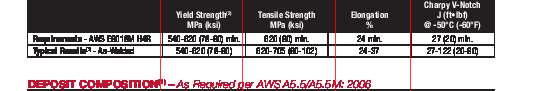

In [308]:
pdf = pdfplumber.open("data/pdf_data/10.pdf")
first_page = pdf.pages[0]
#print(first_page.extract_words())
im = first_page.to_image()
tbl = get_bbox(first_page)
im = tbl.to_image()
for v in get_vlines(tbl):
    im = im.draw_vline(v)

im

In [309]:
tbl.extract_tables(table_settings={
    "vertical_strategy": "explicit", 
    "horizontal_strategy": "lines",
    "explicit_vertical_lines": get_vlines(tbl),
    "explicit_horizontal_lines": [],
    "snap_tolerance": 5,
    "join_tolerance": 10,
    "edge_min_length": 5,
    "min_words_vertical": 1,
    "min_words_horizontal":1,
    "keep_blank_chars": True,
    "text_tolerance": 10,
    "text_x_tolerance": 10,
    "text_y_tolerance": 10,
    "intersection_tolerance": 3,
    "intersection_x_tolerance": None,
    "intersection_y_tolerance": 10,
})

[]

In [202]:
tmp = tmp.dropna(thresh=10, axis= 'columns')
tmp.to_json('lincoln_data.json', orient= 'index')
#print(clean_text(extr_text(get_pdf_txt(100))))
#im = im.draw_rect((0,80,265,300))
#im.draw_rect((265, 80, 600, 300))
    
#str(textract.process('pdf_data/'+str(100)+".pdf"))
#pd.DataFrame(clean_text(extr_text(str(textract.process('pdf_data/'+str(100)+".pdf")))))

NameError: name 'tmp' is not defined

In [60]:
tmp = pd.read_json('lincoln_data.json', orient='index')
tmp

,As,C,Cr,Cu,Diffusible Hydrogen,Mn,Mn + Ni + Cr + Mo + V,Mo,N,Nb,...,S Ni,SN,Si,Si P,Sn,V,conformances,ind,key features,typical applications
0,,0.15 max.,0.20 max.,,4.0 max.,1.60 max.,1.75 max.,0.30 max.,,,...,0.035 max. 0.30 max.,,0.75 max.,,,0.08 max.,diameters / packaging\nh4r\n,0,\nimproved coating integrity\nextreme bend...,\npower generation pressure piping\npetr...
1,,0.03-0.08,0.02-0.07,,2-3,1.01-1.55,1.04-1.75,≤ 0.05,,,...,≤ 0.01 0.01-0.06,,0.34-0.68,,,≤ 0.02,diameters / packaging\nh4r\n,0,\nimproved coating integrity\nextreme bend...,\npower generation pressure piping\npetr...
10,,0.12 max.,,,4.0 max.,0.90 max.,,0.40-0.65,,,...,,,,0.80 max. 0.03 max.,,,typical applications\n(cid:23)(cid:3)fabricati...,5,\n(cid:23)(cid:3)designed for welding 0.50% mo...,diameters / packaging\ndiameter length 8 lb (3...
100,,0.05-0.12,1.00-1.50,,4.0 max.,0.90 max.,,0.40-0.65,,,...,,,0.80 max.,,,,diameters / packaging\ndiameter length 8 lb (3...,56,typical applications\n(cid:23)(cid:3)power gen...,conformances\naws a5.5/a5.5m: 2006 e8018-b2 h4...
101,,0.08-0.11,1.05-1.30,,2-4,0.65-0.80,,0.40-0.60,,,...,,,0.35-0.55,,,,diameters / packaging\ndiameter length 8 lb (3...,56,typical applications\n(cid:23)(cid:3)power gen...,conformances\naws a5.5/a5.5m: 2006 e8018-b2 h4...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,,0.06-0.08,,,,1.2-1.5,,,,,...,,,0.4-0.6,,,,\naws a5.1: e7018-1 h4r\nasme sfa-a5.1: e7018-...,551,\n• 50% less moisture pick vs. competition\n• ...,diameters / packaging\n1 lb (0.5 kg) \n
96,,0.10 max.,0.40 max.,,4.0 max.,1.30-1.80,,0.25-0.50,,,...,,,0.60 max.,,,,key features\ncapable of producing weld depo...,54,typical applications\nquenched and tempered ...,conformances\naws a5.5/a5.5m: 2006 e11018m h4r...
97,,0.04-0.05,0.02-0.20,,1-4,1.55-1.80,,0.40-0.50,,,...,,,0.40-0.55,,,,key features\ncapable of producing weld depo...,54,typical applications\nquenched and tempered ...,conformances\naws a5.5/a5.5m: 2006 e11018m h4r...
98,,0.12 max.,,,4.0 max.,0.90 max.,,0.40-0.65,,,...,,,,0.80 max. 0.03 max.,,,typical applications\n(cid:23)(cid:3)fabricati...,55,\n(cid:23)(cid:3)designed for welding 0.50% mo...,diameters / packaging\ndiameter length 8 lb (3...


In [32]:
def rem_low_value(a):
    a = np.where(a<30, 0, a)
    return a

def run_on_df(df, funct):
    cols = df.columns
    for col in cols:
        df[col] = funct(df[col])
    return df

def run_on_df2(df, funct):
    temp = df
    cols = df.columns
    for col in cols:
        a = df[col]
        df[col] = funct(df, a)
    return df

def clean_linc_cols(a):
    a = a.astype(str)
    
    rems = ['max.', 'max', 'min.', 'min', '<','>','≤','≥', 'Not Specified', 'X']
    for r in rems:
        a = a.astype(str).str.replace(r, "")
    a = a.str.strip()
    a = a.replace("", ",")
    dels = [",",'X','-','']
    for d in dels:
        a = a.replace(d, np.nan)
        
    a = a.astype(str).replace("-Factor(6)", "6")
    a = a.astype(str).str.replace(" ", "-")
    a = a.astype(str).str.replace("---", "-")
    a = a.astype(str).str.replace("--", "-")
    return a


def average_hypen(a):
    a = a.astype(str)
    a = pd.Series(a).str.split("-", expand=True).astype(float).mean(axis=1)
    return a

In [37]:
def clean_data(df):
    a = df.drop(columns=['conformances', 'key features', 'typical applications'], axis='columns')
    a = df.replace(r'^\s*$', np.nan, regex=True)
    a = run_on_df(a, clean_linc_cols)
    a = run_on_df(df, average_hypen)
    return a

tmp = clean_data(tmp)

ValueError: could not convert string to float: 'diameters'

In [38]:
qgrid.show_grid(tmp.dropna(axis='columns',thresh=10))
#pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
#pdfReader.numpages
#print(read_pdf('pdf_data/205.pdf', pages='all')[1])
#new_df = get_mtl_from_pdf_df(extract_pdf(read_pdf('pdf_data/205.pdf', pages='all')))
#pd.DataFrame(new_df.loc[1])
#df[0]['Diameter'][2]
#qgrid.show_grid(pd.DataFrame(extract_pdf(df)))

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [151]:
import camelot

tables  = camelot.read_pdf('test.pdf')
tables[1].df

,0
0,Charpy V-Notch\nYield Strength(2)\nTensile Str...
1,400 (58) min. \n490 (70) min.\n22 min.\n27 (20...
2,430-510 (62-74)\n510-605 (74-88)\n25-37\n121-3...


In [10]:
tmp = pd.read_json('lincoln_data.json', orient='index')
tmp

,As,C,Cr,Cu,Diffusible Hydrogen,Mn,Mn + Ni + Cr + Mo + V,Mo,N,Nb,...,S Ni,SN,Si,Si P,Sn,V,conformances,ind,key features,typical applications
0,,0.15 max.,0.20 max.,,4.0 max.,1.60 max.,1.75 max.,0.30 max.,,,...,0.035 max. 0.30 max.,,0.75 max.,,,0.08 max.,diameters / packaging\nh4r\n,0,\nimproved coating integrity\nextreme bend...,\npower generation pressure piping\npetr...
1,,0.03-0.08,0.02-0.07,,2-3,1.01-1.55,1.04-1.75,≤ 0.05,,,...,≤ 0.01 0.01-0.06,,0.34-0.68,,,≤ 0.02,diameters / packaging\nh4r\n,0,\nimproved coating integrity\nextreme bend...,\npower generation pressure piping\npetr...
10,,0.12 max.,,,4.0 max.,0.90 max.,,0.40-0.65,,,...,,,,0.80 max. 0.03 max.,,,typical applications\n(cid:23)(cid:3)fabricati...,5,\n(cid:23)(cid:3)designed for welding 0.50% mo...,diameters / packaging\ndiameter length 8 lb (3...
100,,0.05-0.12,1.00-1.50,,4.0 max.,0.90 max.,,0.40-0.65,,,...,,,0.80 max.,,,,diameters / packaging\ndiameter length 8 lb (3...,56,typical applications\n(cid:23)(cid:3)power gen...,conformances\naws a5.5/a5.5m: 2006 e8018-b2 h4...
101,,0.08-0.11,1.05-1.30,,2-4,0.65-0.80,,0.40-0.60,,,...,,,0.35-0.55,,,,diameters / packaging\ndiameter length 8 lb (3...,56,typical applications\n(cid:23)(cid:3)power gen...,conformances\naws a5.5/a5.5m: 2006 e8018-b2 h4...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,,0.06-0.08,,,,1.2-1.5,,,,,...,,,0.4-0.6,,,,\naws a5.1: e7018-1 h4r\nasme sfa-a5.1: e7018-...,551,\n• 50% less moisture pick vs. competition\n• ...,diameters / packaging\n1 lb (0.5 kg) \n
96,,0.10 max.,0.40 max.,,4.0 max.,1.30-1.80,,0.25-0.50,,,...,,,0.60 max.,,,,key features\ncapable of producing weld depo...,54,typical applications\nquenched and tempered ...,conformances\naws a5.5/a5.5m: 2006 e11018m h4r...
97,,0.04-0.05,0.02-0.20,,1-4,1.55-1.80,,0.40-0.50,,,...,,,0.40-0.55,,,,key features\ncapable of producing weld depo...,54,typical applications\nquenched and tempered ...,conformances\naws a5.5/a5.5m: 2006 e11018m h4r...
98,,0.12 max.,,,4.0 max.,0.90 max.,,0.40-0.65,,,...,,,,0.80 max. 0.03 max.,,,typical applications\n(cid:23)(cid:3)fabricati...,55,\n(cid:23)(cid:3)designed for welding 0.50% mo...,diameters / packaging\ndiameter length 8 lb (3...


In [ ]:
data = pd.read_json('welding_data.json', orient='index')
data

In [ ]:
urls = urls.append(urls, ignore_index=True, sort=True)    

In [35]:
qgrid.show_grid(urls)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [42]:
tmp.to_json('200121_lincoln_data.json', orient='index')

In [47]:
tmp = tmp.rename(columns={'key features':'Suitable_For','typical applications': 'Applications'})

In [51]:
tmp = tmp.append(data, sort=False)

In [50]:
tmp.to_csv('200122_final_data.csv')

NameError: name 'tmp' is not defined

In [ ]:
data = pd.read_csv('data/combined_data/200121_final_data.csv')

In [30]:
l_data = pd.read_json('data/lincoln_data/lincoln_data.json', orient='index')

In [38]:
urls = urls[:552]

In [40]:
data = pd.merge(urls, data, left_index=True, right_on='ind')

In [44]:
cw_data = pd.read_json("data/ceweld_data/welding_data.json", orient='index')
cw_data

,A5,AWS,Ag,Al,Applications,B,Be,C,Category,Co,...,S,Si,Sn,Suitable_For,Ti,V,W,Zn,Zr,url
0,NaN,A 5.7: ER CuSi-A,0.0,0.0,Brazing thin plates and or galvanized plates i...,0.0,0.0,0.00,1,0.0,...,0.000,2.875,0.0,Joining thin steel plates and or galvanized pl...,0.0,0.0,0.0,0.0,0.0,http://www.ceweld.nl/en/product/cusi-3-laser-b...
1,12.0,A 5.9: ER 430H Mo,0.0,0.0,"Stainles steel shafts, steam valves, clutch su...",0.0,0.0,0.40,2,0.0,...,0.000,0.500,0.0,"X35CrMo17, Cast steels, hardfacing pumps, shaf...",0.0,0.0,0.0,0.0,0.0,http://www.ceweld.nl/en/product/14122
10,8.0,A 5.9:,0.0,0.0,Joining and cladding high heat resistant CrNi-...,0.0,0.0,0.45,2,0.0,...,0.000,1.100,0.0,"1.4852, 1.4853, G-X 40 NiCrNb 35 25, 1.4857, G...",0.0,0.0,0.0,0.0,0.0,http://www.ceweld.nl/en/product/25-35nb
100,22.0,A 5.5: E 7018-A1,0.0,0.0,Mo alloyed basic electrode for welding heat an...,0.0,0.0,0.10,3,0.0,...,0.000,0.500,0.0,"17Mn4, 19Mn5, 15Mo3, 16Mo3, P235GH, P265GH, P2...",0.0,0.0,0.0,0.0,0.0,http://www.ceweld.nl/en/product/7018-a1
101,24.0,A 5.1: E 7018-1 H4R,0.0,0.0,"High strenght steel constructions, offshore pl...",0.0,0.0,0.08,3,0.0,...,0.015,0.600,0.0,\n\nBase metal\nDIN\nEN\nASTM\n\n\nShipbuildin...,0.0,0.0,0.0,0.0,0.0,http://www.ceweld.nl/en/product/7018-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,22.0,A 5.1: E 6012,0.0,0.0,"Shipbuilding, general construction, vessels, w...",0.0,0.0,0.08,3,0.0,...,0.000,0.300,0.0,\n\n\nSteel type:Unalloyed steels:Boiler plat...,0.0,0.0,0.0,0.0,0.0,http://www.ceweld.nl/en/product/6013-s
96,22.0,A 5.1: E 6013,0.0,0.0,"Yacht building, wagon building, train, ship bu...",0.0,0.0,0.08,3,0.0,...,0.000,0.450,0.0,\n\nDIN:Unalloyed steels:Boiler plates:Pipe st...,0.0,0.0,0.0,0.0,0.0,http://www.ceweld.nl/en/product/6013-t
97,24.0,A 5.1: E 6018-1 H4R,0.0,0.0,"Pipe work, shipbuilding, bufferlayers, vessel ...",0.0,0.0,0.03,3,0.0,...,0.012,0.270,0.0,\n\nMaterials\nEN\nASTM\n\n\nshipbuilding stee...,0.0,0.0,0.0,0.0,0.0,http://www.ceweld.nl/en/product/6018-lc
98,22.0,A 5.5: E 7010-A1,0.0,0.0,7010 A 1 is our cellulosic electrode for the v...,0.0,0.0,0.10,3,0.0,...,0.000,0.150,0.0,"St:37.2, 44.2, 37.3, 52.3, H1, H11, 210.7, 290...",0.0,0.0,0.0,0.0,0.0,http://www.ceweld.nl/en/product/7010


In [46]:
data['url'] = data['url_x']

In [49]:
data = data.append(cw_data, ignore_index=False, sort=False)

In [67]:
data.to_csv('data/combined_data/200122_final_data.csv')

In [57]:
#Cleaning data to go into final json
data = pd.read_csv('data/combined_data/200122_final_data.csv')
data = data.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'])

In [135]:
data.drop(columns = ['url_x', 'url_y'])

KeyError: "['url_x' 'url_y'] not found in axis"

In [59]:
pd.merge(data['Name'], data['name'], left_index=True, right_index=True)

,Name,name
0,NaN,Products_Consumable_StickElectrodes-MildandLow...
1,NaN,Products_Consumable_StickElectrodes-MildandLow...
2,NaN,Products_Consumable_StickElectrodes-MildandLow...
3,NaN,Products_Consumable_StickElectrodes-MildandLow...
4,NaN,Products_Consumable_StickElectrodes-MildandLow...
...,...,...
1615,6013 S,NaN
1616,6013 T,NaN
1617,6018 LC,NaN
1618,7010,NaN


In [63]:
data['name'] = np.where(data['Name'].isna(), data['name'], data['Name'])
data['category'] = np.where(data['Category'].isna(), data['category'], data['Category'])

In [66]:
data = data.drop(columns=['url_x', 'url_y', 'Name', 'Category', 'urls'])

In [73]:
a = data[:960]
b = data[960:]

In [77]:
cols = a.dropna(thresh=10, axis='columns').columns

In [ ]:
data = data[cols]

In [122]:
data['name'].count()

1620

In [128]:
t = pd.DataFrame(data.iloc[0])
name = t[0]['name'].replace('/', '-')
t.to_json('data/combined_data/'+'jsons/'+(name)+'.json')

In [131]:
def make_jsons_from_df(df, directory):
    for a in range (0, data['name'].count()):
        d = pd.DataFrame(data.iloc[a])
        name = d[a]['name'].replace('/', '-')
        d.to_json(directory+'jsons/'+str(a)+" "+(name)+'.json')


In [134]:
make_jsons_from_df(data, 'data/combined_data/')
data.to_json('data/combined_data/total.json', orient='index')